# Experiments with Labmates
#### Belen Martin Urcelay
#### Nov. 2023

## Imports

In [1]:
# Set notebook up to load files from Science repo
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Ensure that we re-load changes automagically
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

In [12]:
import math
import pickle
import random
import glob
import re
import pandas as pd
import numpy as np

In [4]:
#%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

### Import Functions

In [14]:
from science.agents import GridEnvironment, QLearningAgent_Bernoulli_PbRL

In [6]:
from science.draw_map import create_grid_map, add_trajectory, map_reward_estimation

In [7]:
from science.feedback_pairwise import ask_preference_HF

## Initialize the map

In [10]:
def random_road(car_init, num_steps, grid_width, grid_height):
    # initialize the path with the car's initial position
    road = [car_init[0]]
    
    for _ in range(num_steps):
        # get the last position
        last_position = road[-1]
        
        # generate possible moves
        possible_moves = []
        if last_position[0] < grid_width - 1:  #if not on the right edge
            possible_moves.append([last_position[0] + 1, last_position[1]])
        
        if last_position[1] < grid_height - 1:  #if not on the upper edge
            possible_moves.append([last_position[0], last_position[1] + 1])
        
        # if there are possible moves, randomly choose one
        if possible_moves:
            new_position = possible_moves[np.random.randint(0, len(possible_moves))]
            road.append(new_position)
        else:
            break   #if stuck (at upper-right corner), then end the loop early
    
    return np.array(road)

In [8]:
grid_height = 5
grid_width = 10
num_landmarks = 4
num_steps = 10
car_init = [[0, 0]]
num_iters_per_experiment = 4

In [13]:
car_init = [[0, 0]]

## Load Experiments

[(0, 1), (1, 1), (1, 2), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4), (5, 4), (6, 4)]


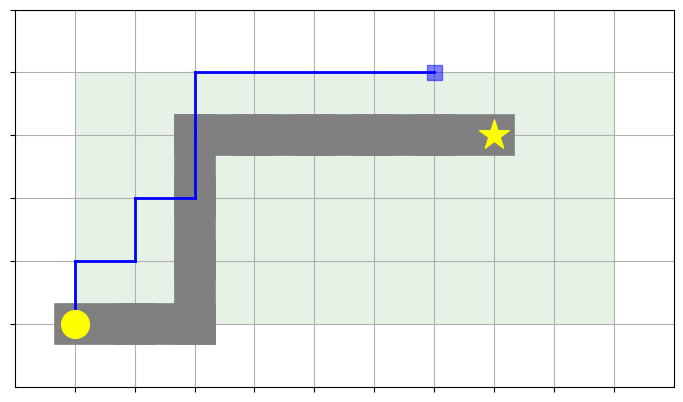

[(1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (8, 2)]


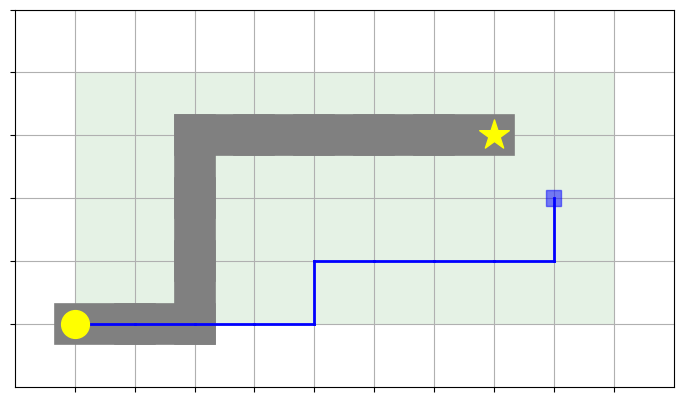

Which trajectory is better? (0: above, 1: below) 0
[(0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (3, 4), (4, 4), (5, 4)]


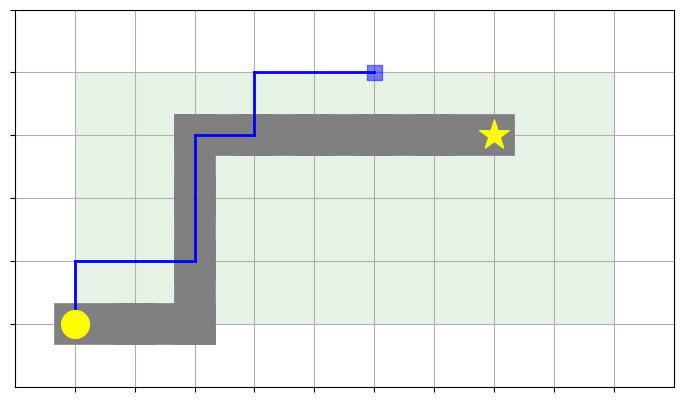

[(1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (5, 1), (5, 2), (6, 2), (6, 3), (7, 3)]


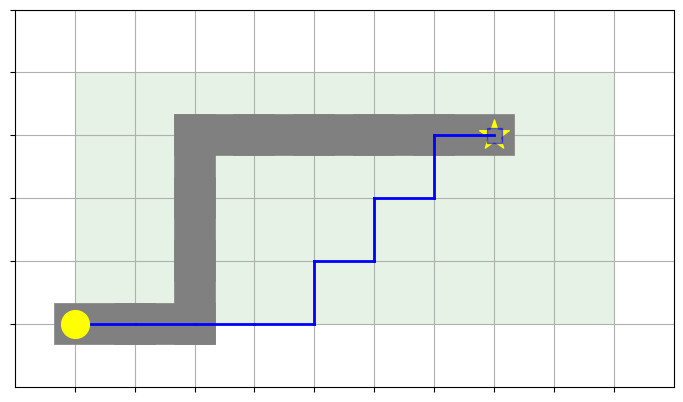

Which trajectory is better? (0: above, 1: below) 1
[(1, 0), (2, 0), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3), (5, 3), (5, 4), (6, 4)]


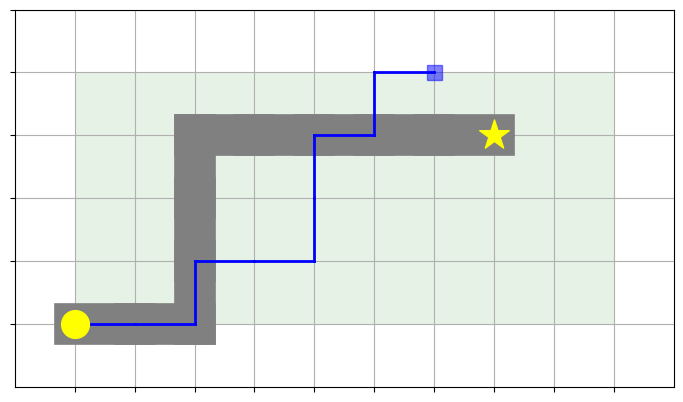

[(0, 1), (1, 1), (1, 2), (1, 3), (1, 4), (2, 4), (2, 4), (3, 4), (3, 4), (3, 4)]


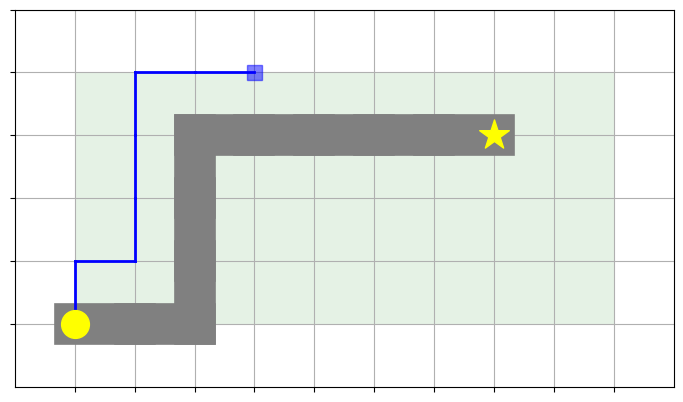

Which trajectory is better? (0: above, 1: below) 0
[(0, 1), (1, 1), (1, 2), (1, 3), (1, 4), (1, 4), (2, 4), (3, 4), (4, 4), (4, 4)]


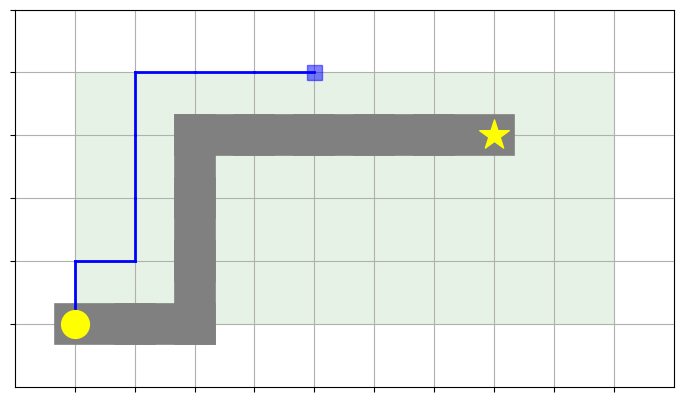

[(1, 0), (2, 0), (3, 0), (3, 1), (4, 1), (5, 1), (5, 2), (5, 3), (6, 3), (6, 4)]


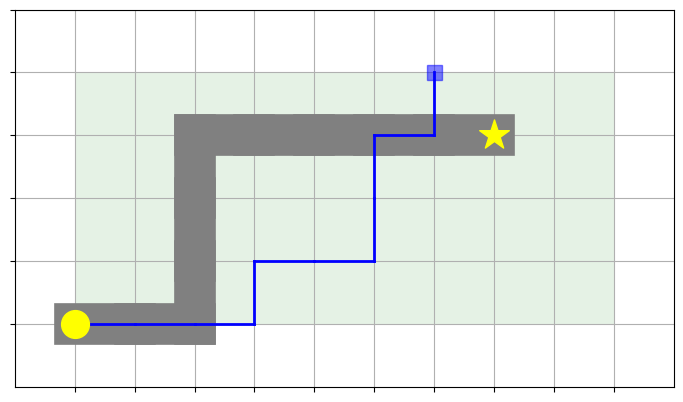

Which trajectory is better? (0: above, 1: below) 1
[(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (3, 4), (3, 4), (3, 4)]


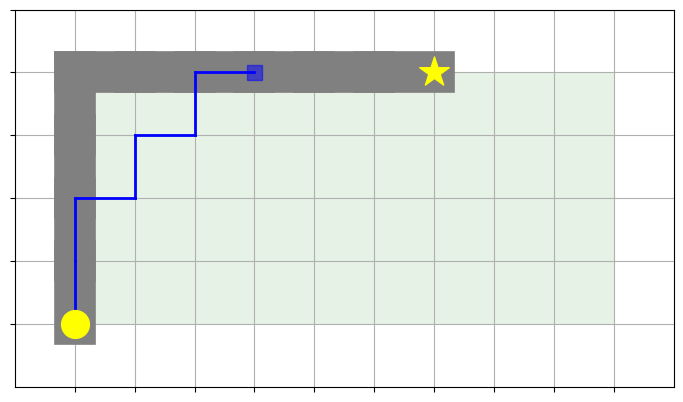

[(1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (5, 4), (5, 4)]


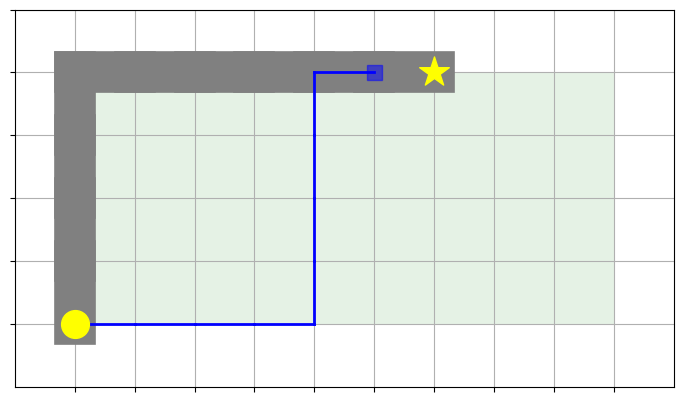

Which trajectory is better? (0: above, 1: below) 0
[(0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (2, 4), (2, 4), (2, 4), (3, 4), (4, 4)]


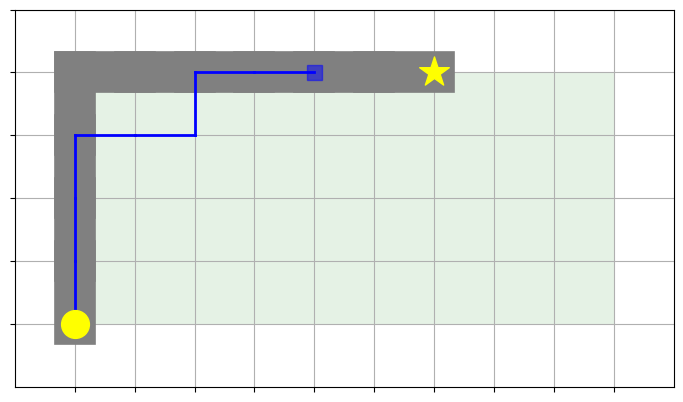

[(1, 0), (2, 0), (3, 0), (3, 1), (4, 1), (5, 1), (5, 2), (6, 2), (6, 3), (7, 3)]


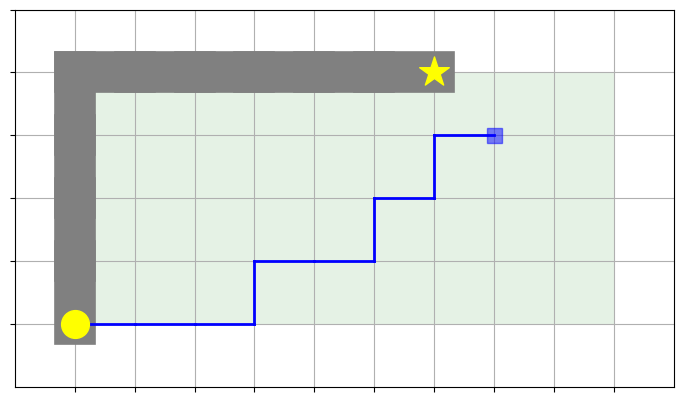

Which trajectory is better? (0: above, 1: below) 0
[(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (3, 4), (4, 4), (4, 4)]


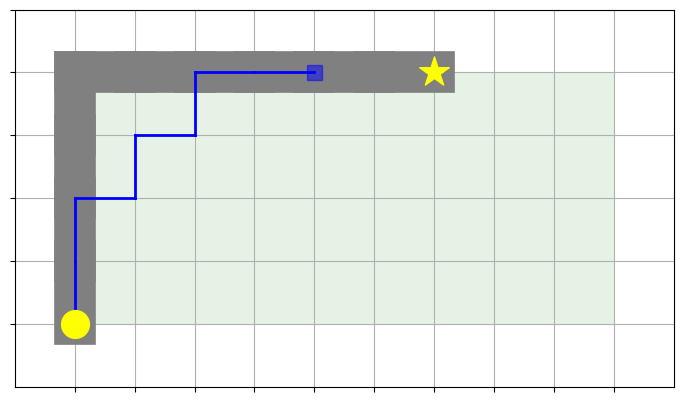

[(1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (5, 2), (6, 2), (6, 3), (6, 4)]


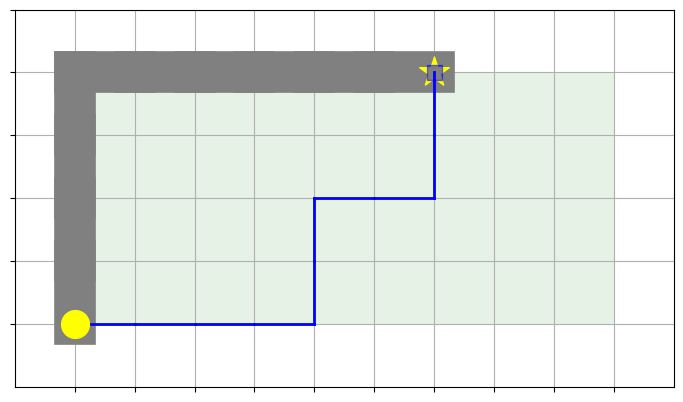

Which trajectory is better? (0: above, 1: below) 0
[(1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 4), (4, 4), (5, 4)]


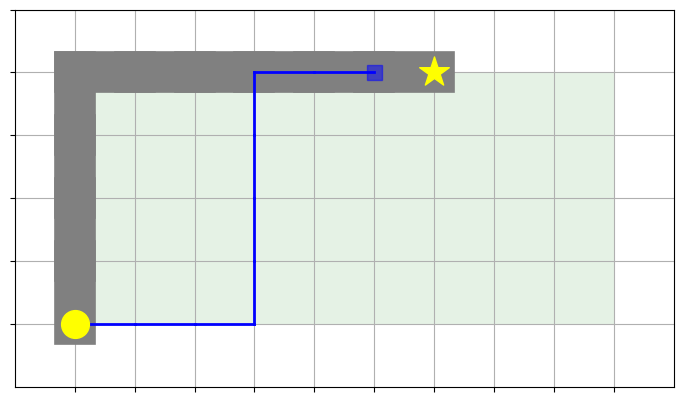

[(0, 1), (0, 2), (1, 2), (1, 3), (1, 4), (1, 4), (1, 4), (2, 4), (2, 4), (2, 4)]


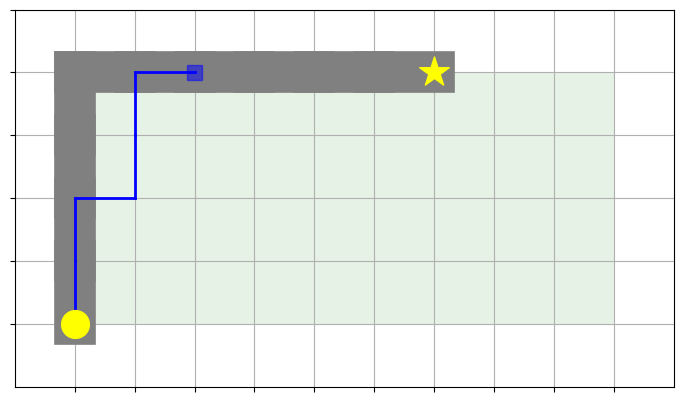

Which trajectory is better? (0: above, 1: below) 0
[(1, 0), (1, 1), (1, 2), (2, 2), (3, 2), (3, 3), (4, 3), (5, 3), (6, 3), (7, 3)]


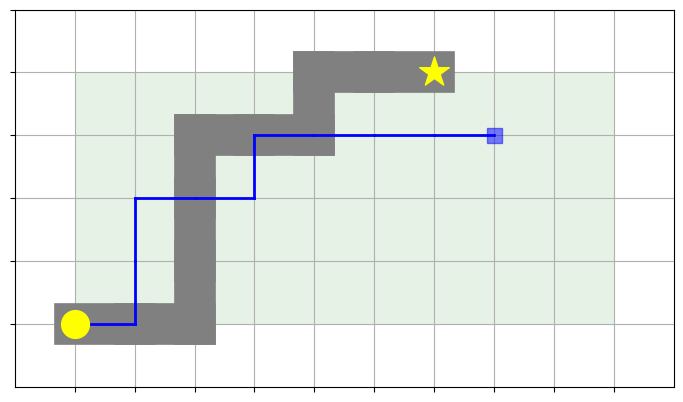

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 4), (1, 4), (1, 4), (1, 4), (2, 4), (3, 4)]


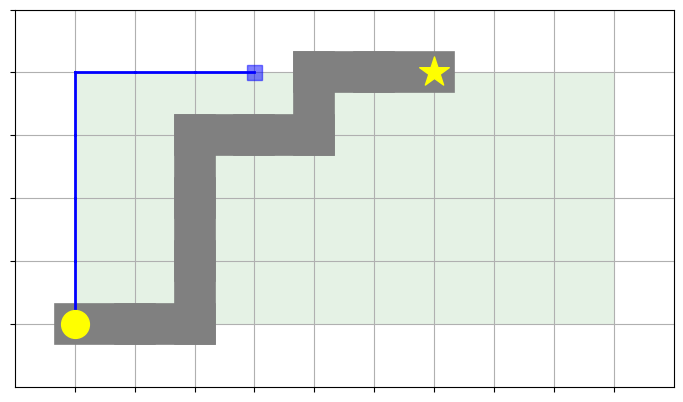

Which trajectory is better? (0: above, 1: below) 0
[(0, 1), (0, 2), (1, 2), (1, 3), (1, 4), (1, 4), (1, 4), (1, 4), (1, 4), (1, 4)]


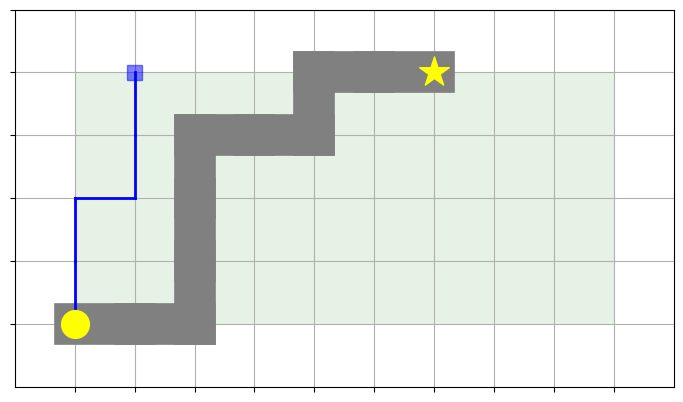

[(1, 0), (1, 1), (2, 1), (2, 2), (3, 2), (3, 3), (4, 3), (4, 4), (4, 4), (4, 4)]


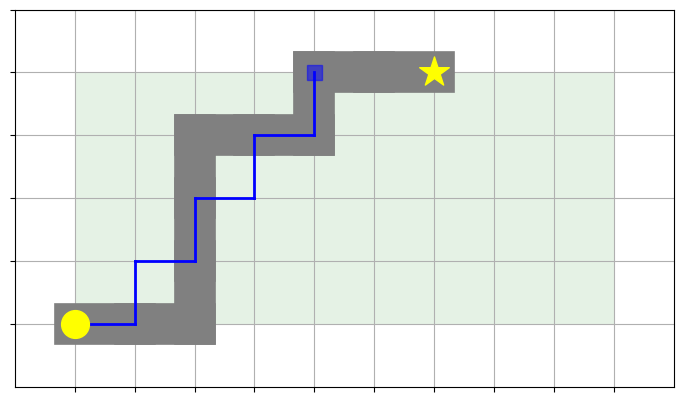

Which trajectory is better? (0: above, 1: below) 1
[(1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (3, 3), (4, 3), (5, 3), (6, 3), (6, 4)]


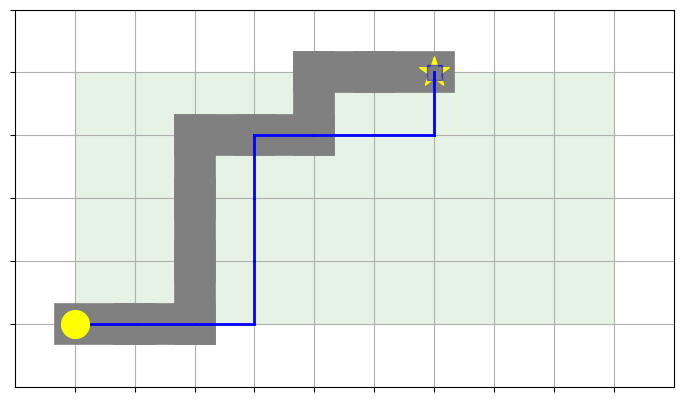

[(0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (1, 4), (2, 4), (2, 4), (3, 4), (4, 4)]


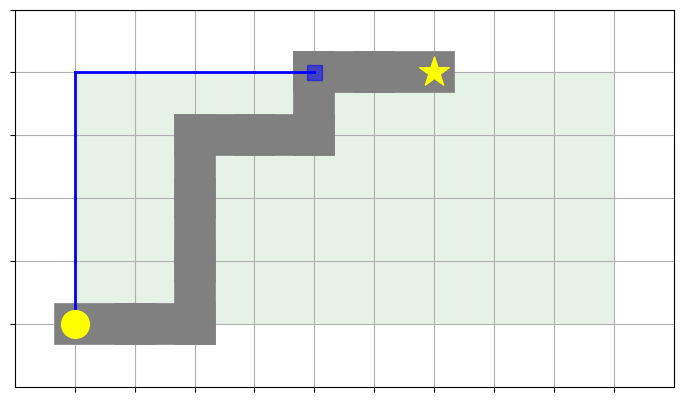

Which trajectory is better? (0: above, 1: below) 0
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 4), (1, 4), (2, 4), (2, 4), (3, 4), (3, 4)]


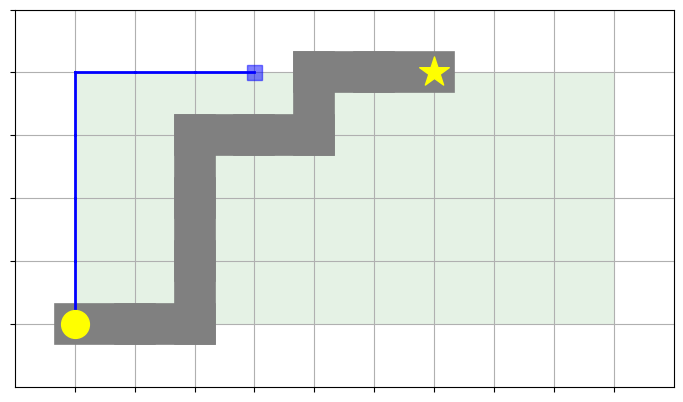

[(1, 0), (2, 0), (2, 1), (3, 1), (3, 2), (3, 3), (3, 4), (4, 4), (4, 4), (4, 4)]


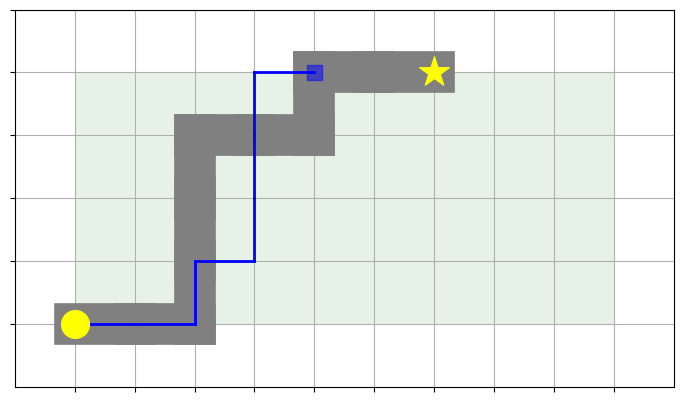

Which trajectory is better? (0: above, 1: below) 1
[(0, 1), (1, 1), (1, 2), (2, 2), (3, 2), (3, 3), (3, 4), (3, 4), (4, 4), (4, 4)]


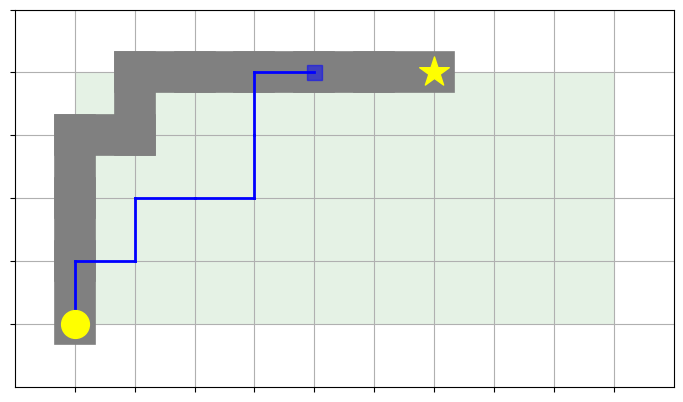

[(1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (5, 3), (5, 4), (6, 4)]


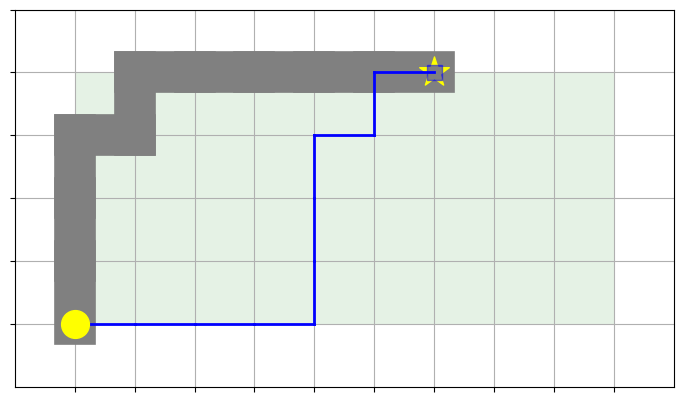

Which trajectory is better? (0: above, 1: below) 0
[(0, 1), (1, 1), (1, 2), (1, 3), (1, 4), (1, 4), (1, 4), (1, 4), (1, 4), (2, 4)]


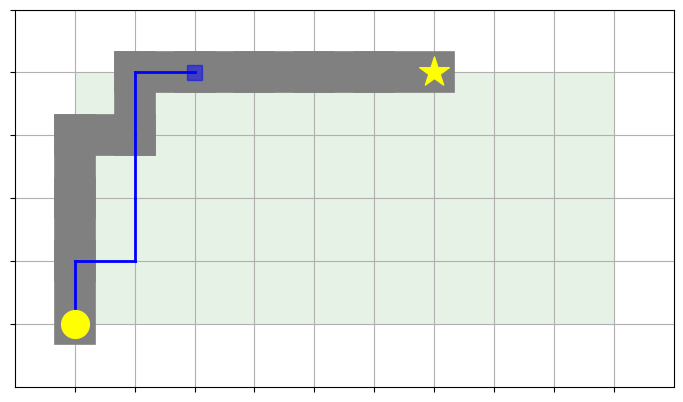

[(1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (4, 4), (5, 4), (5, 4)]


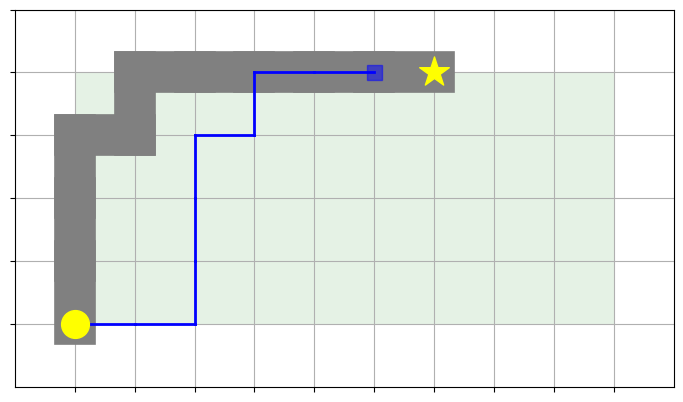

Which trajectory is better? (0: above, 1: below) 0
[(0, 1), (0, 2), (1, 2), (1, 3), (1, 4), (2, 4), (2, 4), (2, 4), (3, 4), (3, 4)]


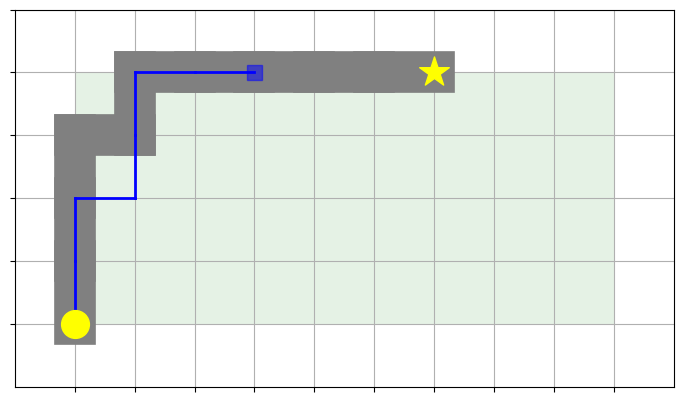

[(1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (5, 1), (6, 1), (6, 2), (7, 2), (7, 3)]


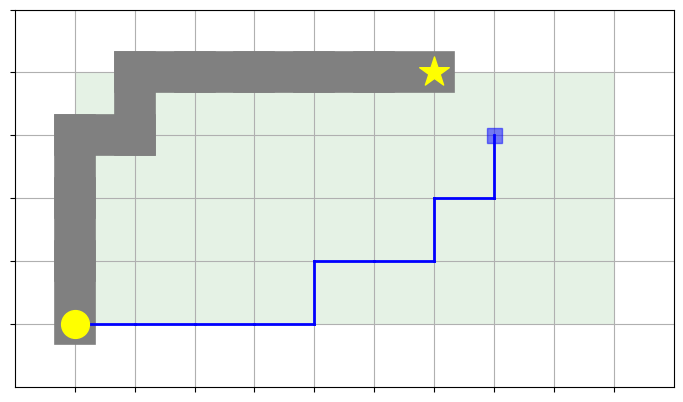

Which trajectory is better? (0: above, 1: below) 0
[(0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4), (5, 4), (6, 4)]


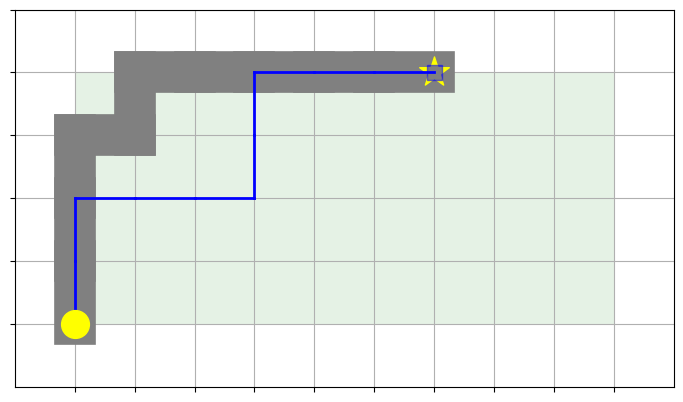

[(1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 4), (3, 4), (3, 4), (3, 4)]


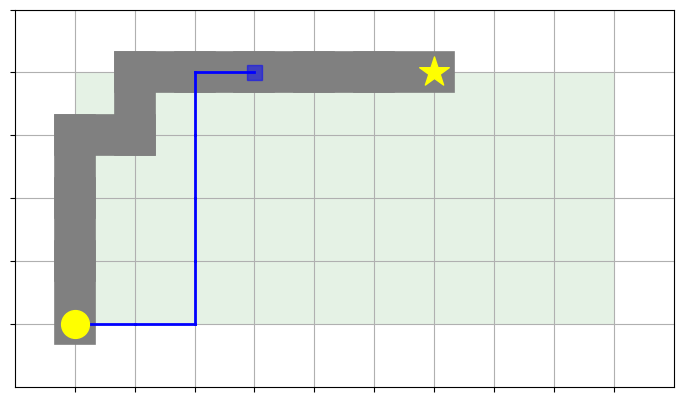

Which trajectory is better? (0: above, 1: below) 0
[(1, 0), (2, 0), (2, 1), (3, 1), (3, 2), (3, 3), (3, 4), (4, 4), (4, 4), (4, 4)]


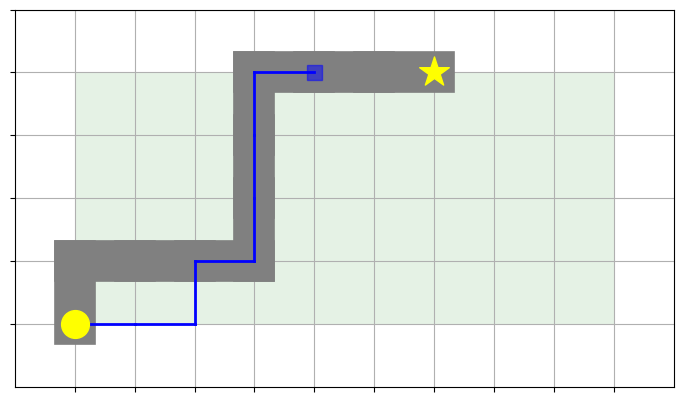

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 4), (0, 4), (1, 4), (2, 4), (2, 4), (2, 4)]


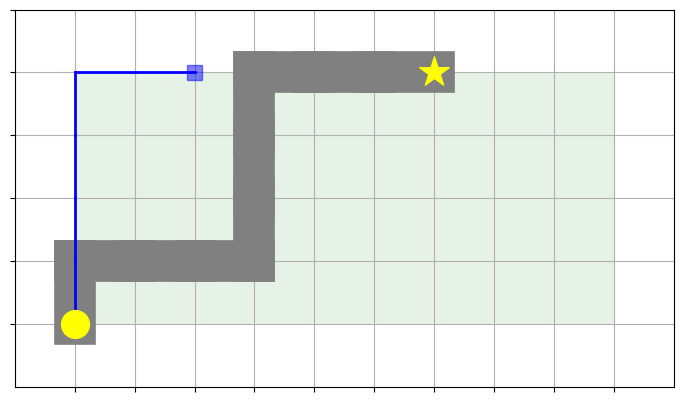

Which trajectory is better? (0: above, 1: below) 0
[(1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3), (4, 4), (4, 4), (5, 4)]


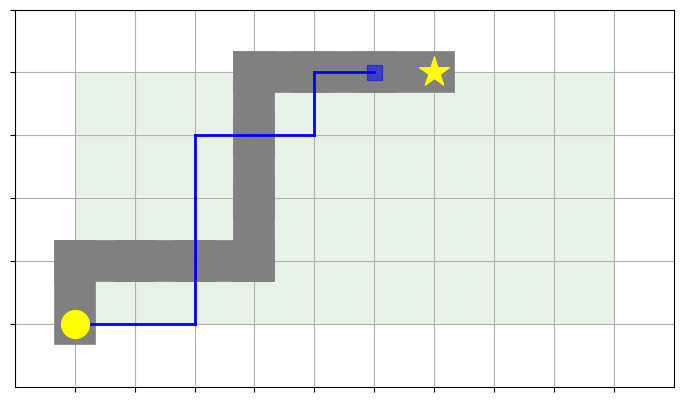

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 4), (0, 4), (1, 4), (1, 4), (2, 4), (2, 4)]


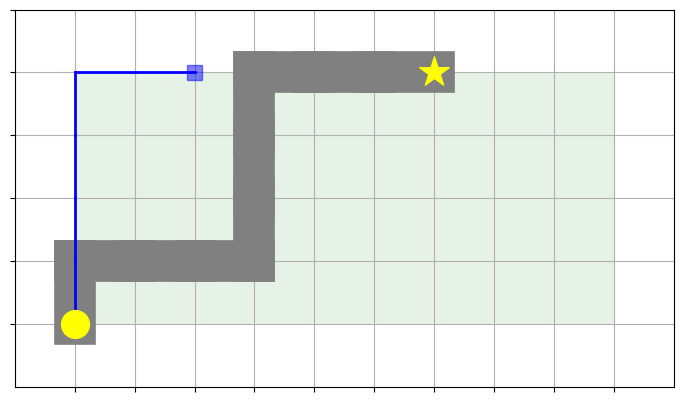

Which trajectory is better? (0: above, 1: below) 0
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 4), (1, 4), (2, 4), (2, 4), (2, 4), (3, 4)]


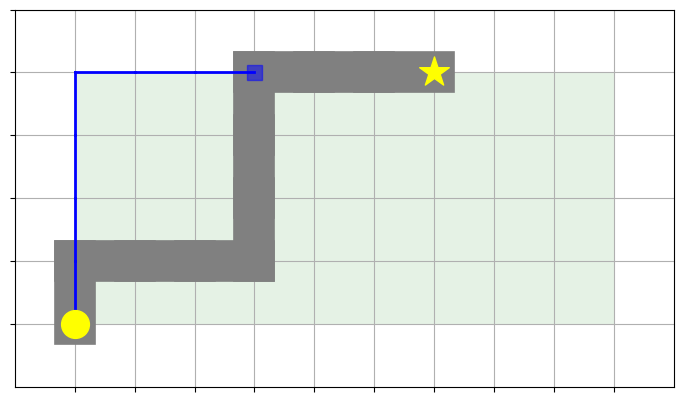

[(1, 0), (2, 0), (2, 1), (3, 1), (3, 2), (4, 2), (4, 3), (5, 3), (6, 3), (6, 4)]


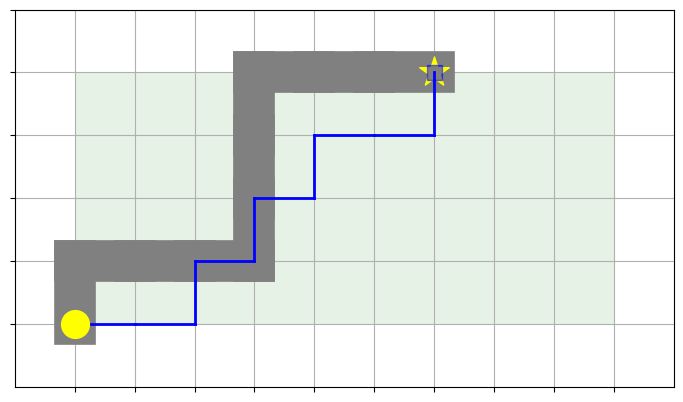

Which trajectory is better? (0: above, 1: below) 1
[(0, 1), (0, 2), (1, 2), (1, 3), (1, 4), (1, 4), (1, 4), (2, 4), (3, 4), (4, 4)]


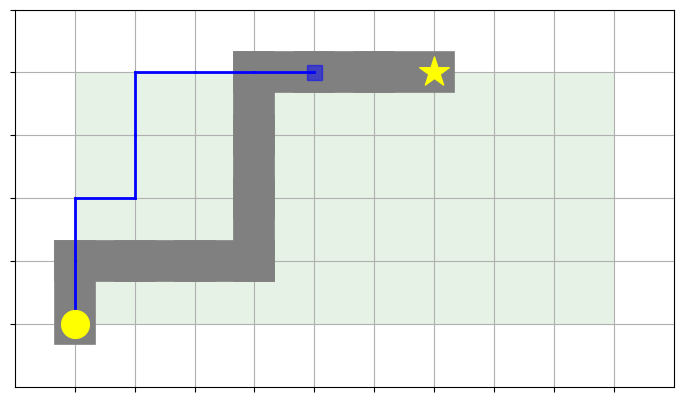

[(1, 0), (2, 0), (2, 1), (3, 1), (3, 2), (3, 3), (3, 4), (3, 4), (4, 4), (5, 4)]


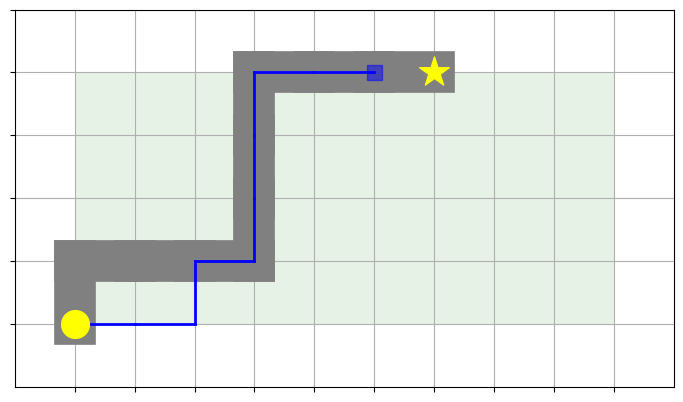

Which trajectory is better? (0: above, 1: below) 1
[(1, 0), (2, 0), (3, 0), (3, 1), (4, 1), (5, 1), (5, 2), (6, 2), (7, 2), (8, 2)]


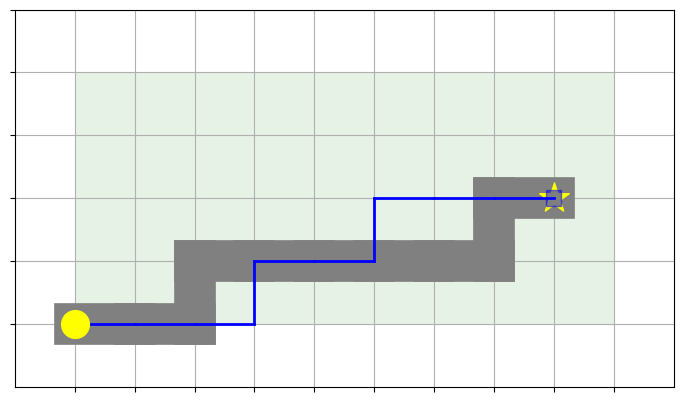

[(0, 1), (1, 1), (2, 1), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4), (5, 4), (5, 4)]


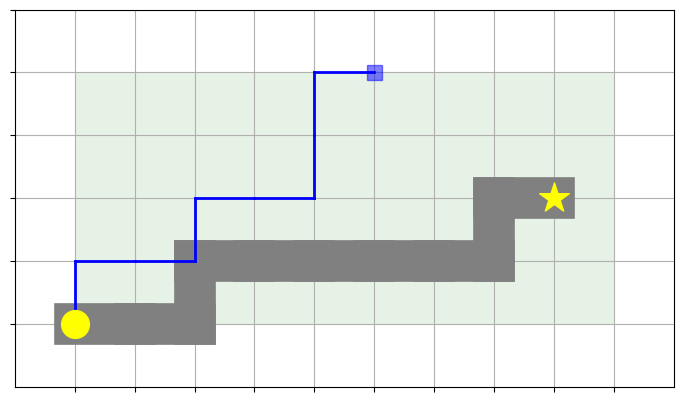

Which trajectory is better? (0: above, 1: below) 0
[(1, 0), (2, 0), (2, 1), (3, 1), (3, 2), (4, 2), (5, 2), (5, 3), (5, 4), (6, 4)]


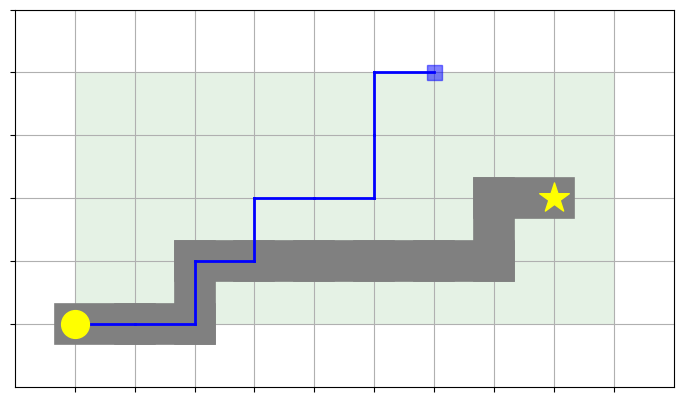

[(0, 1), (1, 1), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (3, 4), (4, 4), (5, 4)]


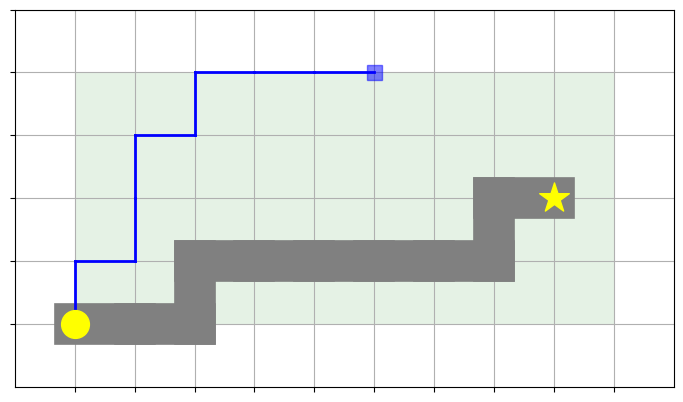

Which trajectory is better? (0: above, 1: below) 0
[(1, 0), (2, 0), (3, 0), (3, 1), (4, 1), (4, 2), (5, 2), (6, 2), (6, 3), (6, 4)]


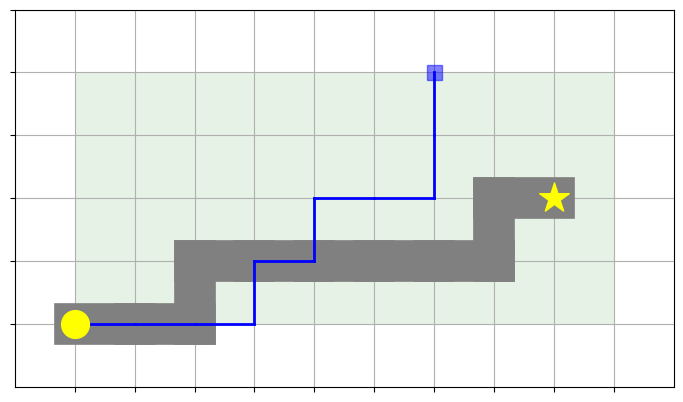

[(0, 1), (0, 2), (0, 3), (1, 3), (1, 4), (2, 4), (3, 4), (3, 4), (3, 4), (4, 4)]


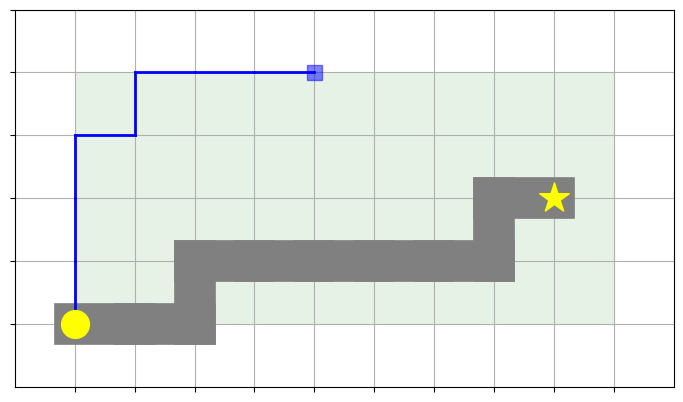

Which trajectory is better? (0: above, 1: below) 0
[(0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (2, 4), (2, 4), (2, 4), (3, 4), (4, 4)]


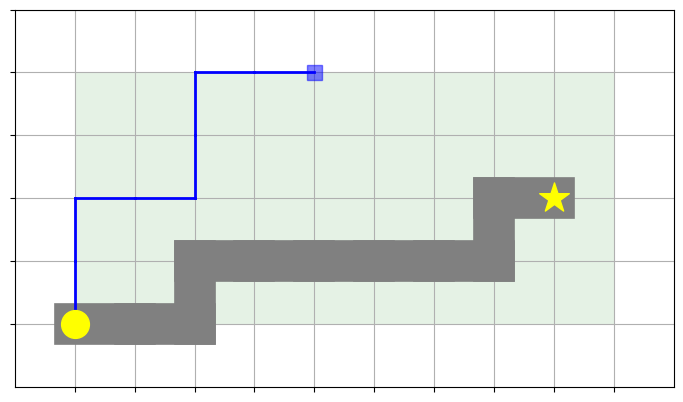

[(1, 0), (2, 0), (2, 1), (3, 1), (4, 1), (4, 2), (5, 2), (6, 2), (6, 3), (7, 3)]


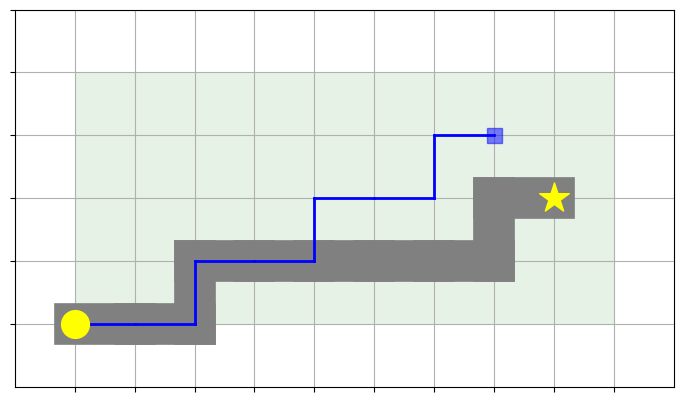

Which trajectory is better? (0: above, 1: below) 1
[(1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (5, 1), (6, 1), (6, 2), (7, 2), (8, 2)]


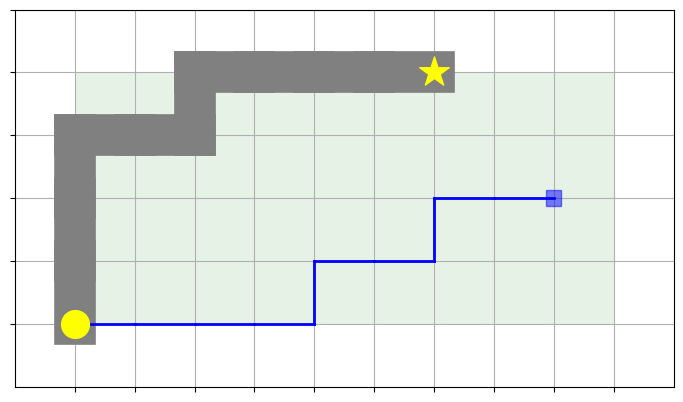

[(0, 1), (1, 1), (1, 2), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4), (5, 4), (5, 4)]


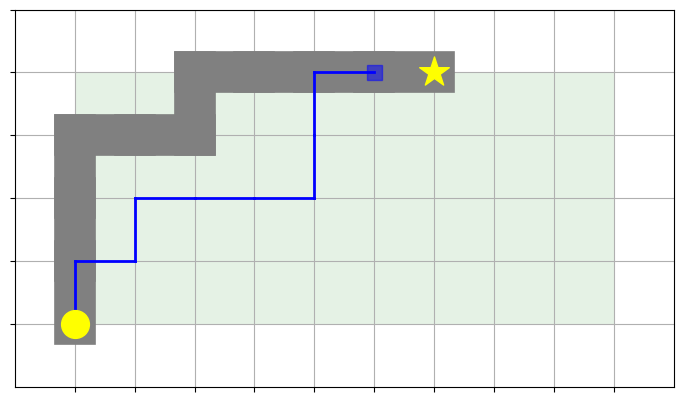

Which trajectory is better? (0: above, 1: below) 1
[(1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (4, 2), (5, 2), (5, 3), (6, 3), (7, 3)]


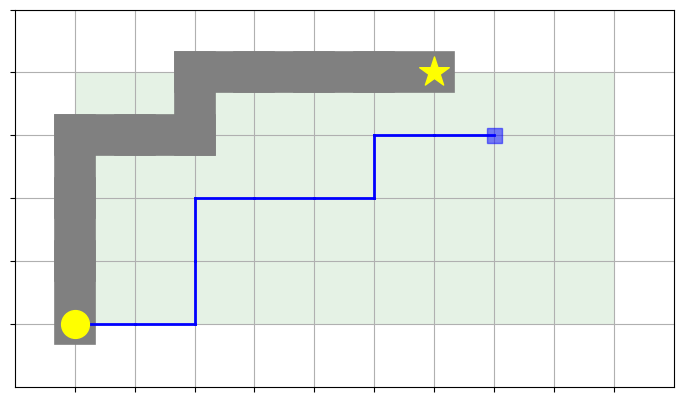

[(0, 1), (1, 1), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 4), (4, 4), (5, 4)]


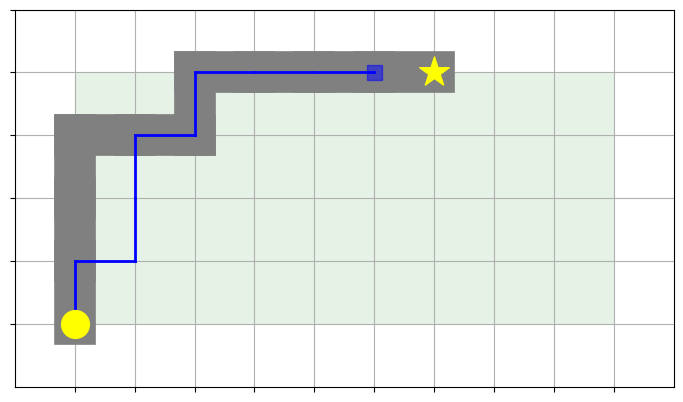

Which trajectory is better? (0: above, 1: below) 1
[(1, 0), (1, 1), (1, 2), (1, 3), (2, 3), (2, 4), (2, 4), (3, 4), (3, 4), (4, 4)]


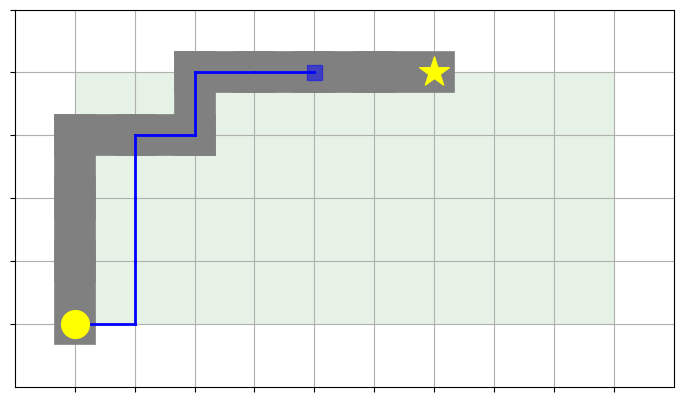

[(0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (6, 3), (6, 4)]


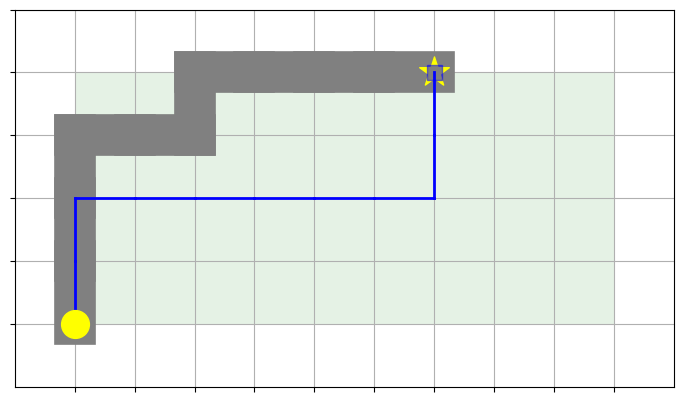

Which trajectory is better? (0: above, 1: below) 0
[(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (5, 1), (6, 1), (6, 2), (7, 2), (8, 2)]


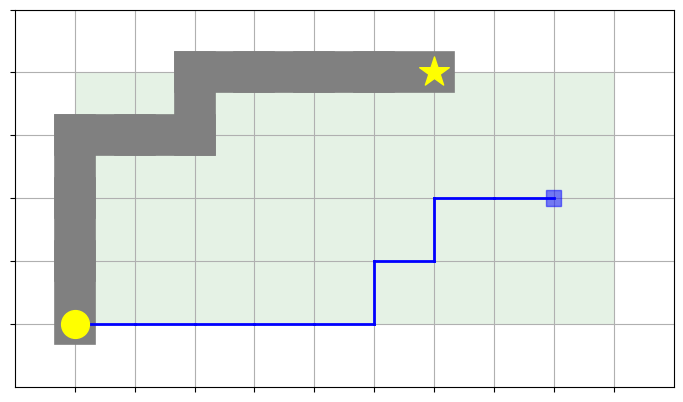

[(0, 1), (1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (4, 3), (4, 4), (5, 4), (5, 4)]


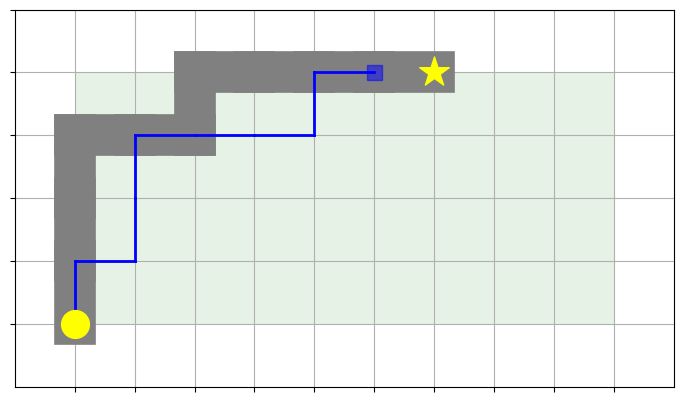

Which trajectory is better? (0: above, 1: below) 1
[(1, 0), (2, 0), (2, 1), (3, 1), (4, 1), (5, 1), (5, 2), (6, 2), (7, 2), (7, 3)]


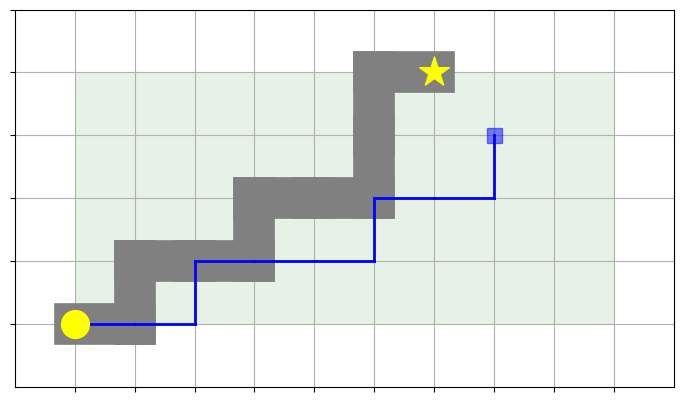

[(0, 1), (1, 1), (1, 2), (1, 3), (2, 3), (2, 4), (2, 4), (3, 4), (4, 4), (4, 4)]


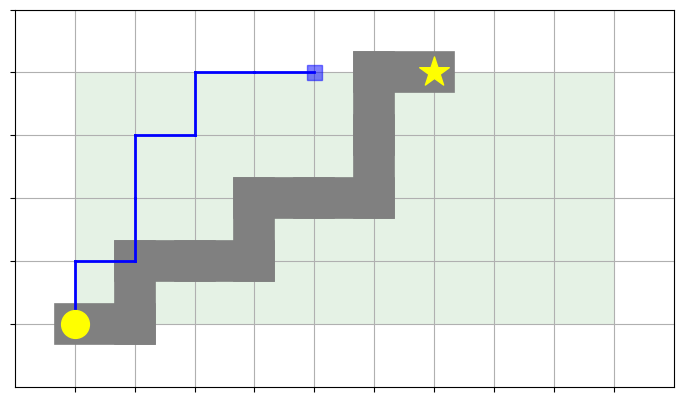

Which trajectory is better? (0: above, 1: below) 0
[(0, 1), (0, 2), (0, 3), (1, 3), (1, 4), (1, 4), (2, 4), (2, 4), (3, 4), (3, 4)]


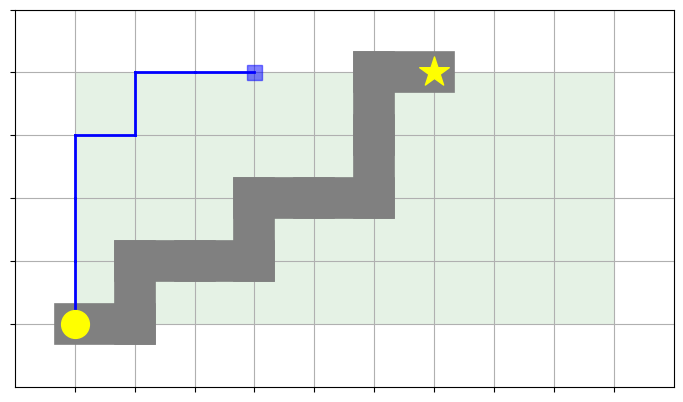

[(1, 0), (2, 0), (2, 1), (3, 1), (4, 1), (5, 1), (5, 2), (6, 2), (6, 3), (7, 3)]


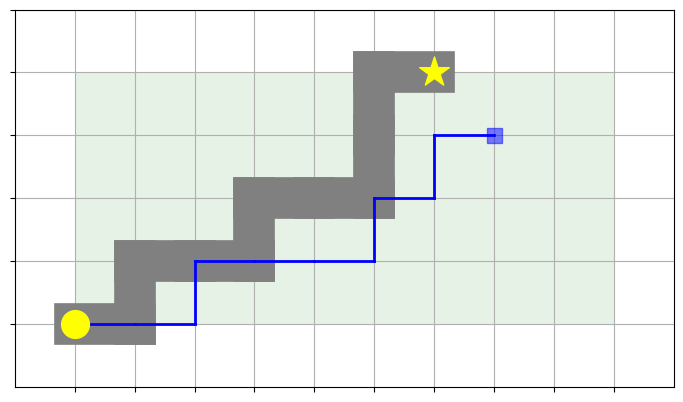

Which trajectory is better? (0: above, 1: below) 1
[(1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (7, 3)]


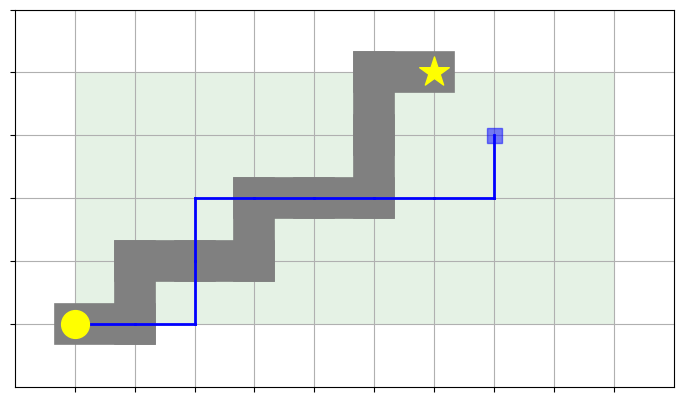

[(0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (1, 4), (1, 4), (1, 4), (1, 4), (2, 4)]


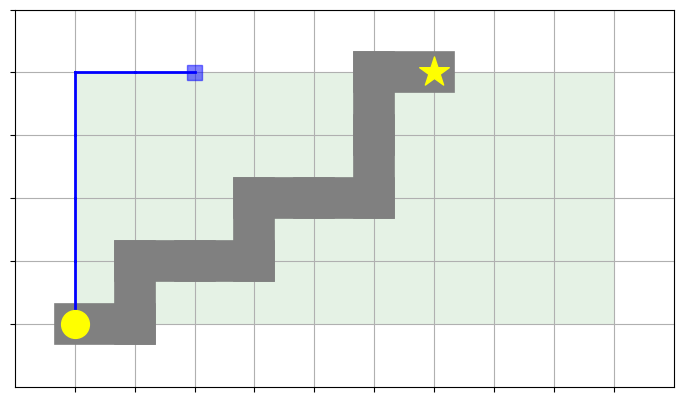

Which trajectory is better? (0: above, 1: below) 0
[(0, 1), (0, 2), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (4, 4), (4, 4), (4, 4)]


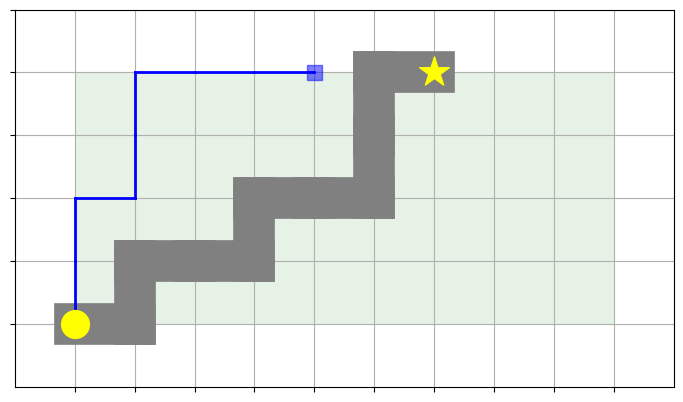

[(1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (5, 1), (5, 2), (6, 2), (7, 2), (8, 2)]


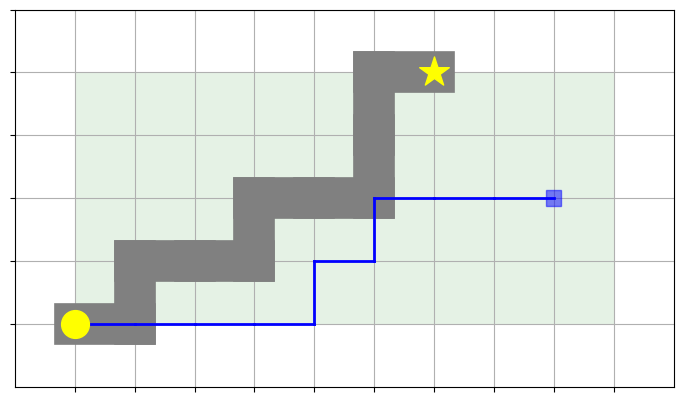

Which trajectory is better? (0: above, 1: below) 1
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4), (5, 4)]


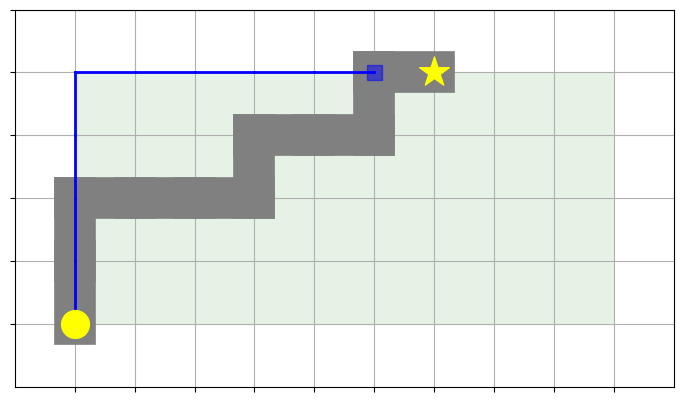

[(1, 0), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (7, 2), (8, 2)]


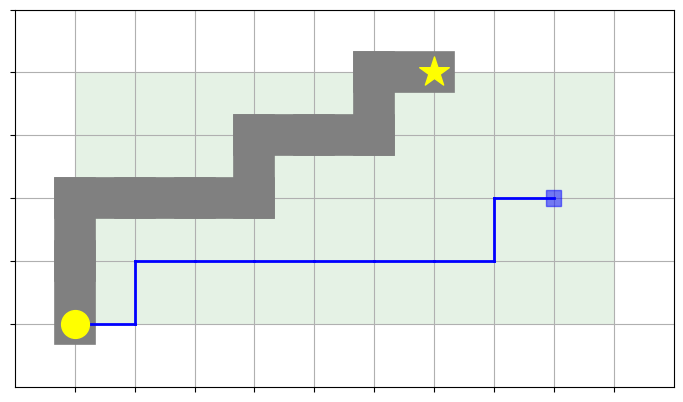

Which trajectory is better? (0: above, 1: below) 0
[(0, 1), (0, 2), (0, 3), (1, 3), (1, 4), (1, 4), (1, 4), (2, 4), (2, 4), (3, 4)]


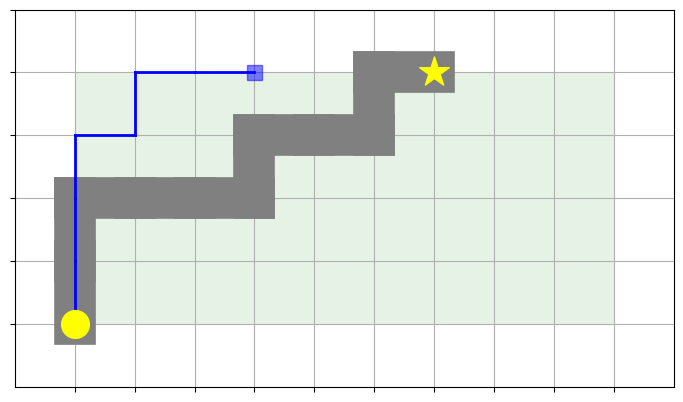

[(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (5, 1), (6, 1), (6, 2), (6, 3), (7, 3)]


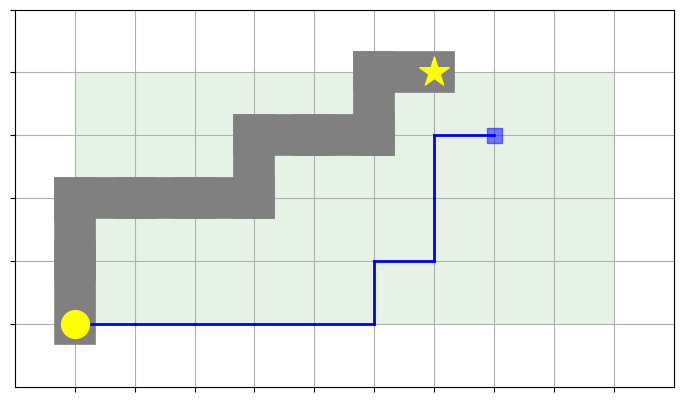

Which trajectory is better? (0: above, 1: below) 0
[(1, 0), (2, 0), (3, 0), (3, 1), (4, 1), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2)]


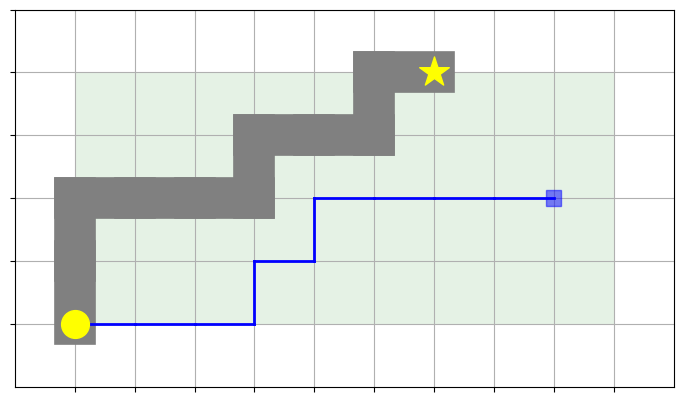

[(0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (1, 4), (1, 4), (1, 4), (2, 4), (2, 4)]


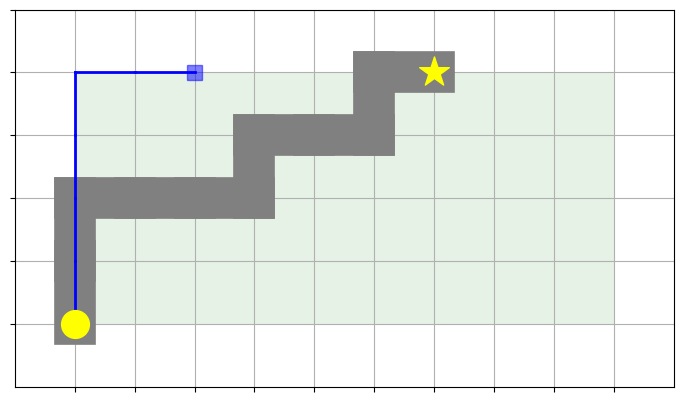

Which trajectory is better? (0: above, 1: below) 1
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 4), (0, 4), (0, 4), (1, 4), (1, 4), (2, 4)]


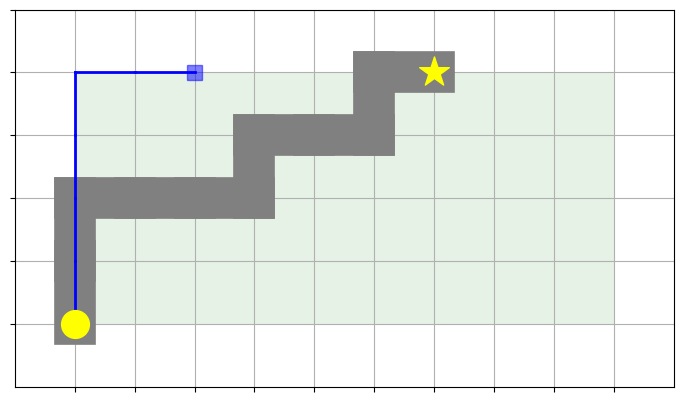

[(1, 0), (2, 0), (2, 1), (3, 1), (4, 1), (4, 2), (5, 2), (5, 3), (5, 4), (6, 4)]


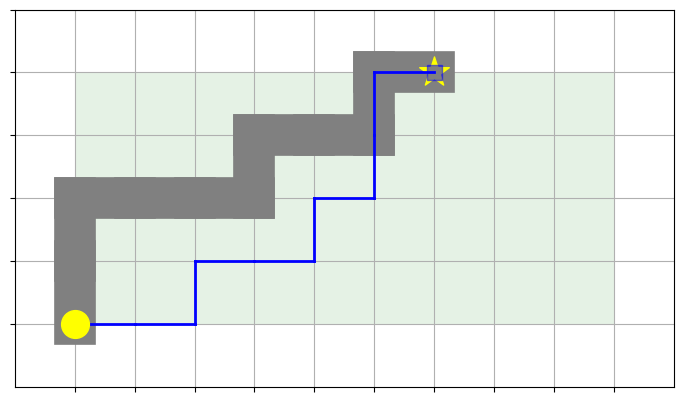

Which trajectory is better? (0: above, 1: below) 1
[(0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3), (4, 4), (5, 4), (6, 4)]


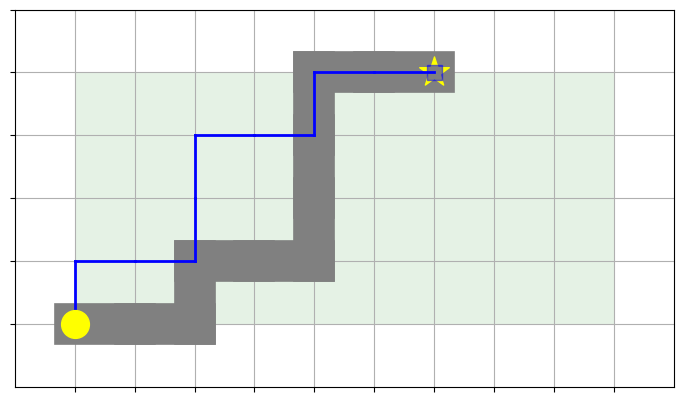

[(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (6, 1), (6, 2), (6, 3), (7, 3)]


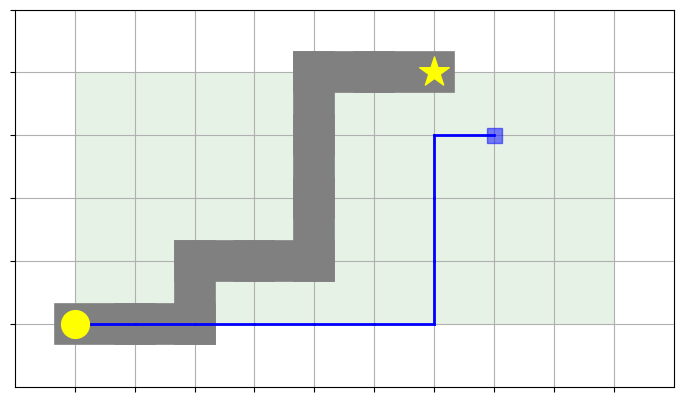

Which trajectory is better? (0: above, 1: below) 0
[(1, 0), (2, 0), (3, 0), (3, 1), (4, 1), (5, 1), (5, 2), (6, 2), (6, 3), (7, 3)]


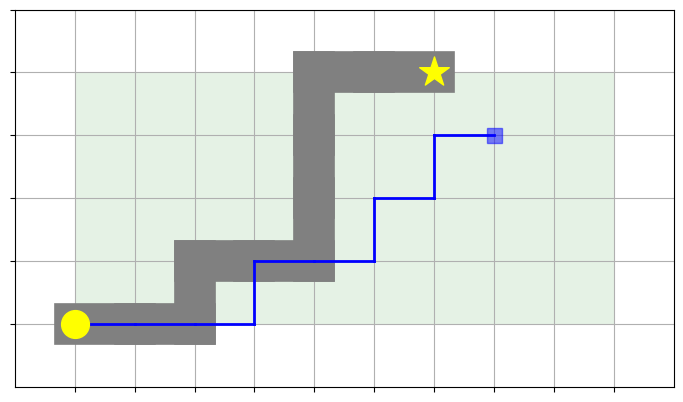

[(0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3), (3, 4), (3, 4), (4, 4), (5, 4)]


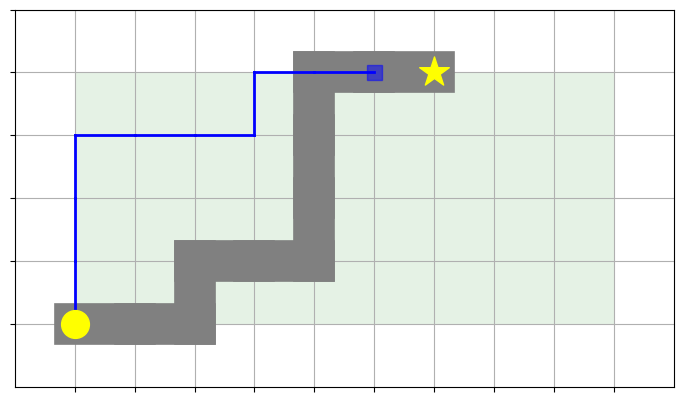

Which trajectory is better? (0: above, 1: below) 0
[(1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (3, 3), (4, 3), (5, 3), (5, 4), (6, 4)]


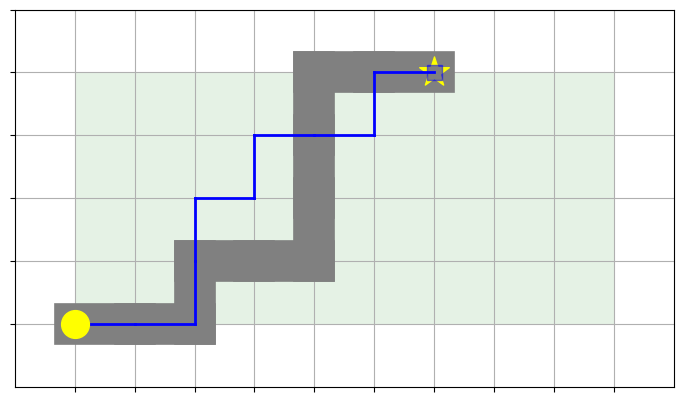

[(0, 1), (1, 1), (1, 2), (1, 3), (2, 3), (2, 4), (2, 4), (3, 4), (3, 4), (4, 4)]


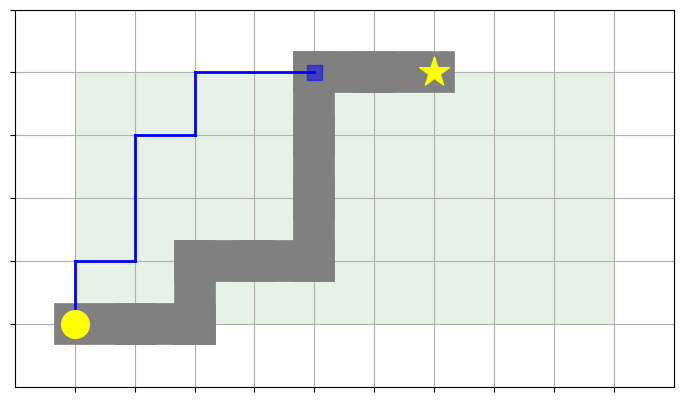

Which trajectory is better? (0: above, 1: below) 0
[(1, 0), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (5, 2), (5, 3), (5, 4), (5, 4)]


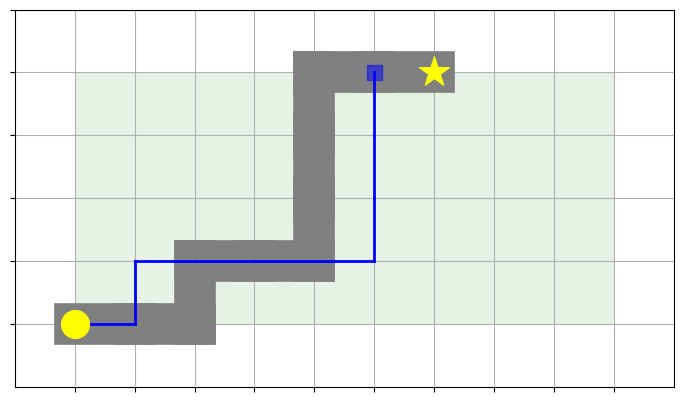

[(0, 1), (0, 2), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (3, 4), (4, 4), (4, 4)]


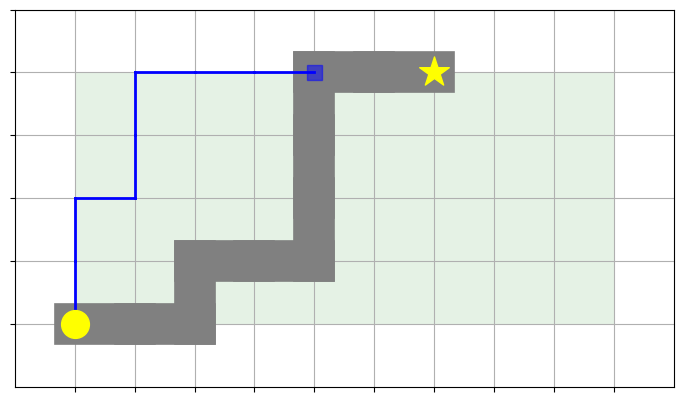

Which trajectory is better? (0: above, 1: below) 0
[(1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (3, 3), (4, 3), (5, 3), (6, 3), (6, 4)]


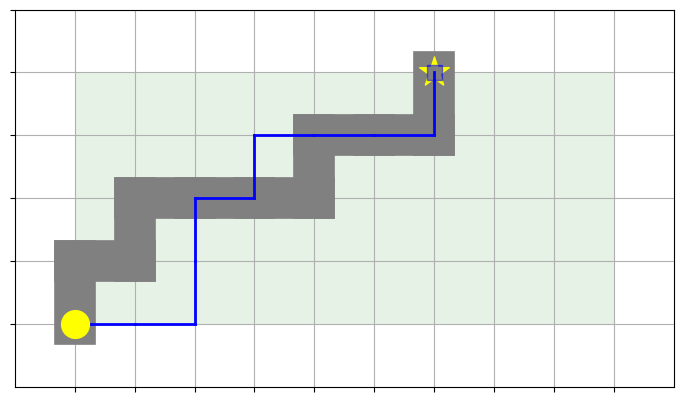

[(0, 1), (0, 2), (0, 3), (1, 3), (1, 4), (2, 4), (2, 4), (2, 4), (2, 4), (2, 4)]


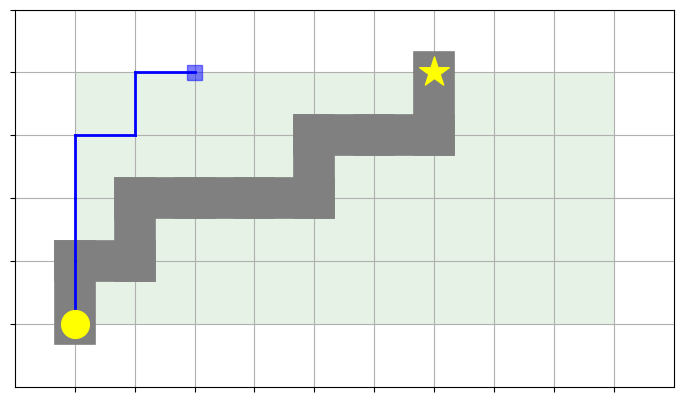

Which trajectory is better? (0: above, 1: below) 0
[(0, 1), (0, 2), (1, 2), (1, 3), (1, 4), (1, 4), (1, 4), (1, 4), (1, 4), (2, 4)]


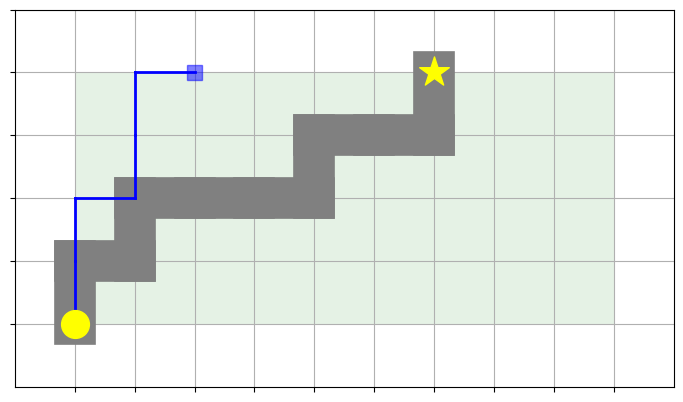

[(1, 0), (1, 1), (2, 1), (2, 2), (3, 2), (3, 3), (4, 3), (5, 3), (5, 4), (6, 4)]


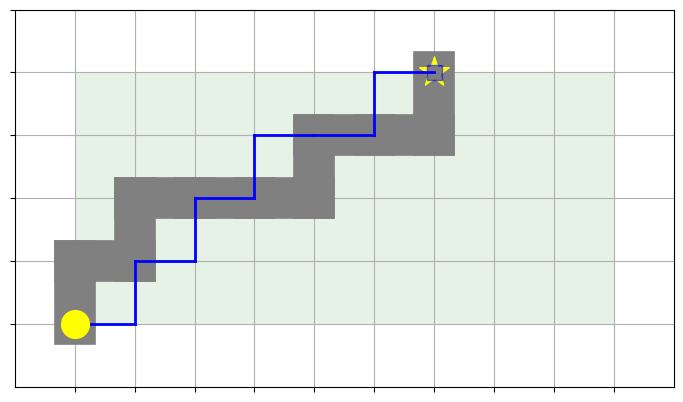

Which trajectory is better? (0: above, 1: below) 1
[(0, 1), (0, 2), (0, 3), (1, 3), (1, 4), (1, 4), (1, 4), (1, 4), (2, 4), (3, 4)]


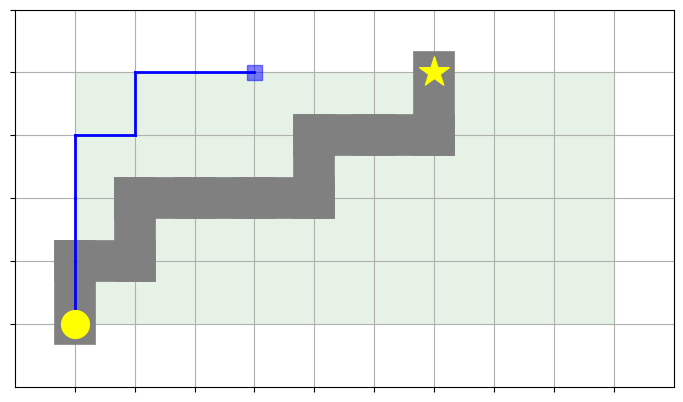

[(1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (3, 3), (4, 3), (5, 3), (5, 4), (6, 4)]


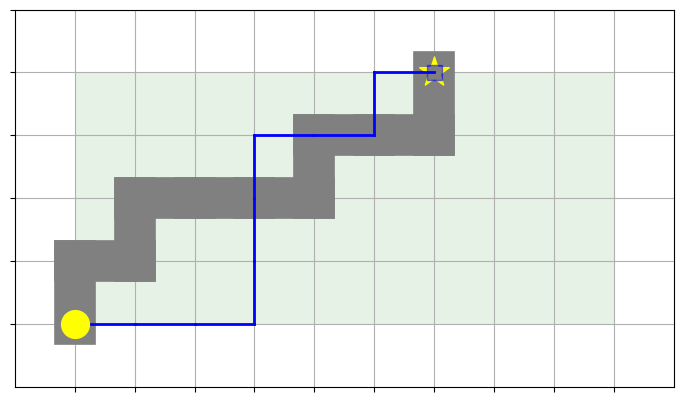

Which trajectory is better? (0: above, 1: below) 1
[(0, 1), (0, 2), (0, 3), (1, 3), (1, 4), (1, 4), (2, 4), (3, 4), (4, 4), (5, 4)]


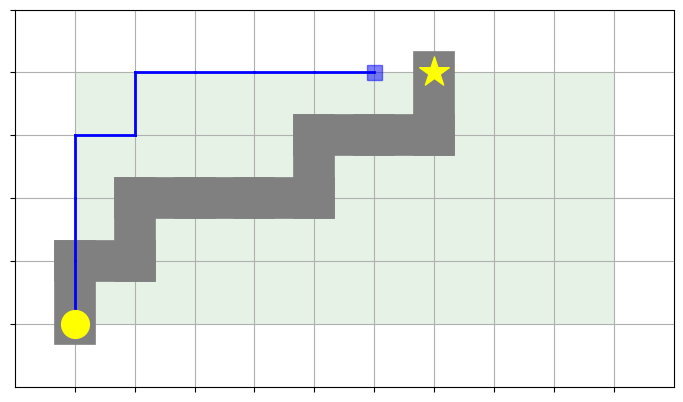

[(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (6, 1), (7, 1), (7, 2), (7, 3)]


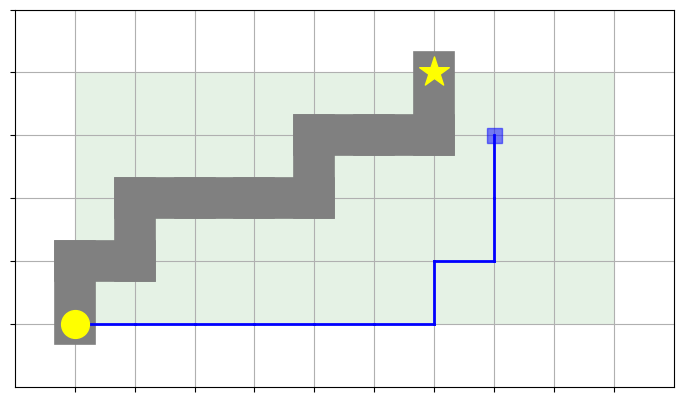

Which trajectory is better? (0: above, 1: below) 0
[(0, 1), (0, 2), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (4, 4), (4, 4), (4, 4)]


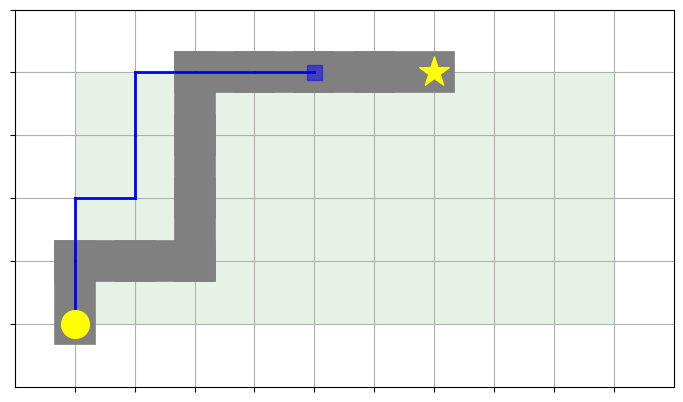

[(1, 0), (2, 0), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]


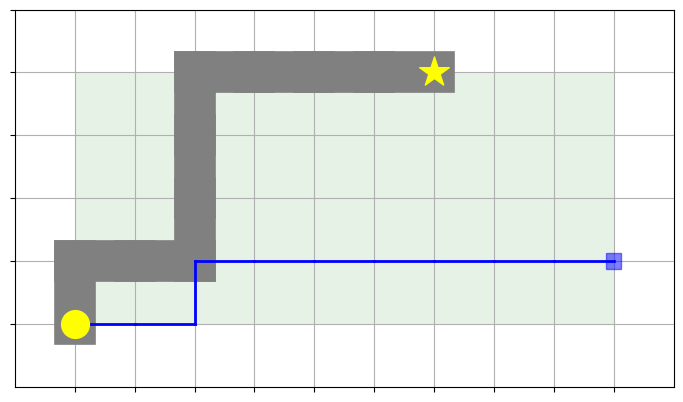

Which trajectory is better? (0: above, 1: below) 0
[(0, 1), (0, 2), (1, 2), (1, 3), (1, 4), (1, 4), (2, 4), (3, 4), (3, 4), (3, 4)]


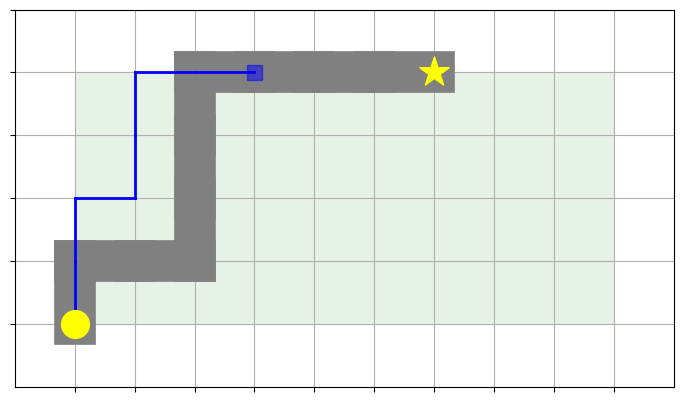

[(1, 0), (2, 0), (2, 1), (3, 1), (4, 1), (5, 1), (5, 2), (6, 2), (7, 2), (7, 3)]


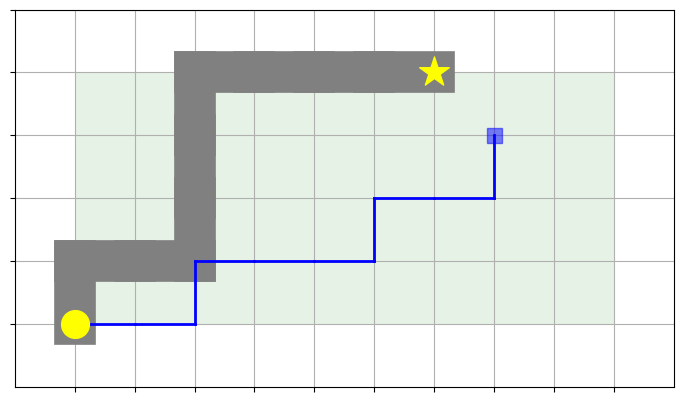

Which trajectory is better? (0: above, 1: below) 0
[(1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (3, 3), (4, 3), (5, 3), (5, 4), (5, 4)]


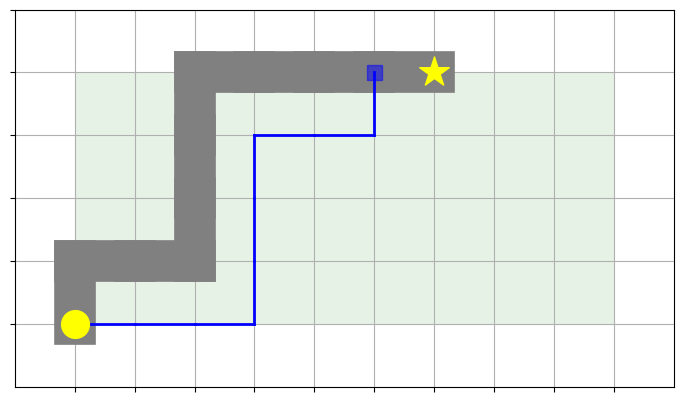

[(0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (1, 4), (1, 4), (1, 4), (1, 4), (2, 4)]


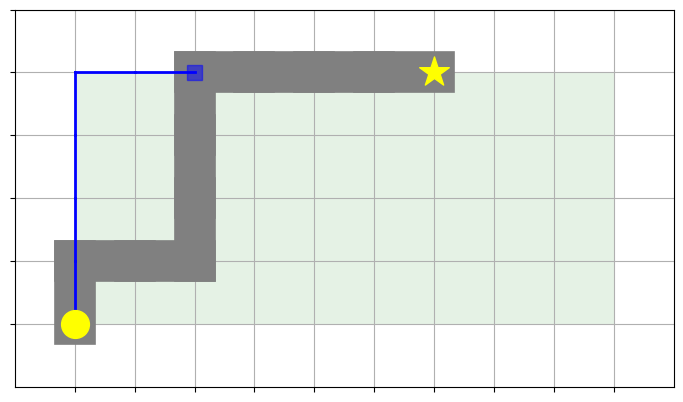

Which trajectory is better? (0: above, 1: below) 1
[(1, 0), (2, 0), (2, 1), (3, 1), (3, 2), (3, 3), (4, 3), (5, 3), (5, 4), (5, 4)]


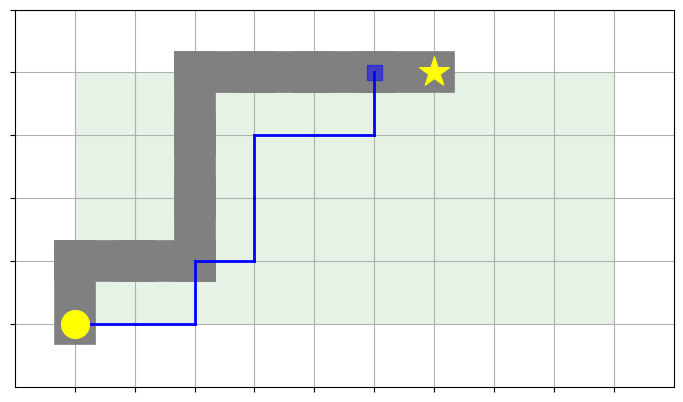

[(0, 1), (0, 2), (1, 2), (1, 3), (1, 4), (2, 4), (2, 4), (2, 4), (3, 4), (3, 4)]


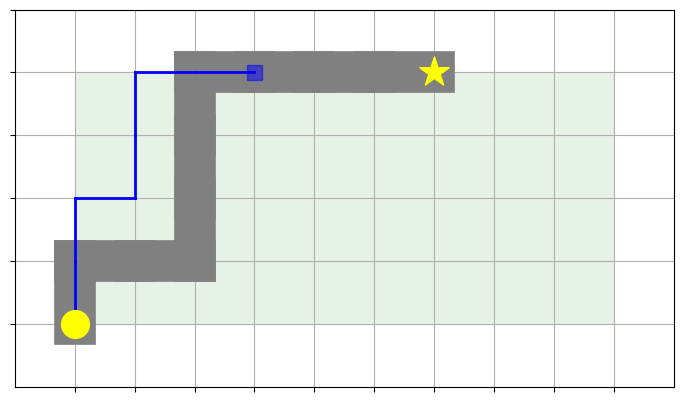

Which trajectory is better? (0: above, 1: below) 1
[(0, 1), (1, 1), (2, 1), (3, 1), (3, 2), (3, 3), (3, 4), (3, 4), (4, 4), (4, 4)]


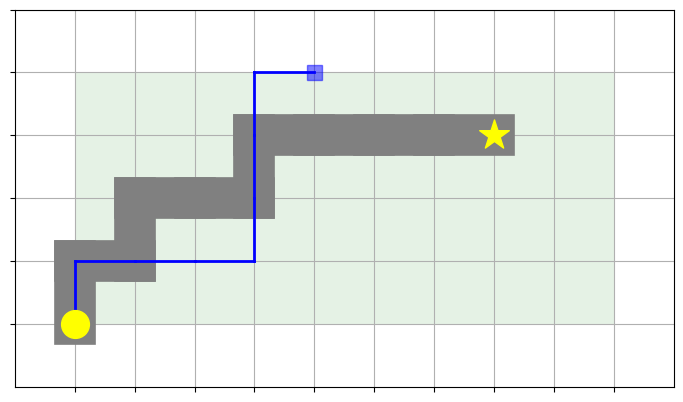

[(1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (5, 4), (5, 4)]


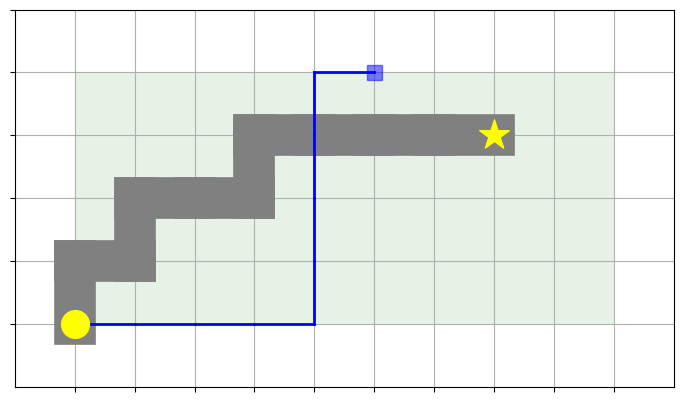

Which trajectory is better? (0: above, 1: below) 0
[(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (7, 1), (7, 2), (7, 3)]


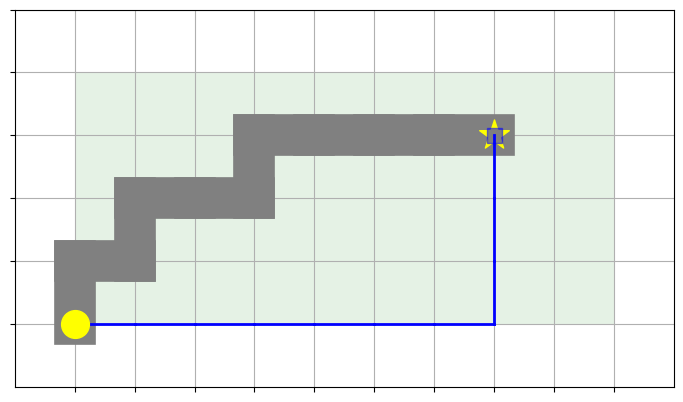

[(0, 1), (1, 1), (1, 2), (2, 2), (2, 3), (3, 3), (4, 3), (4, 4), (5, 4), (5, 4)]


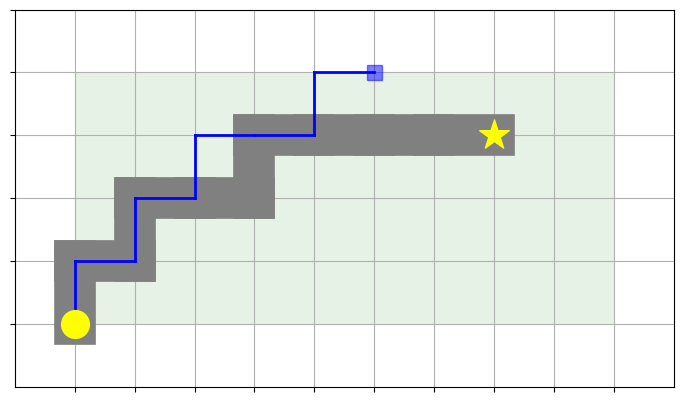

Which trajectory is better? (0: above, 1: below) 1
[(0, 1), (1, 1), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (3, 4), (4, 4), (4, 4)]


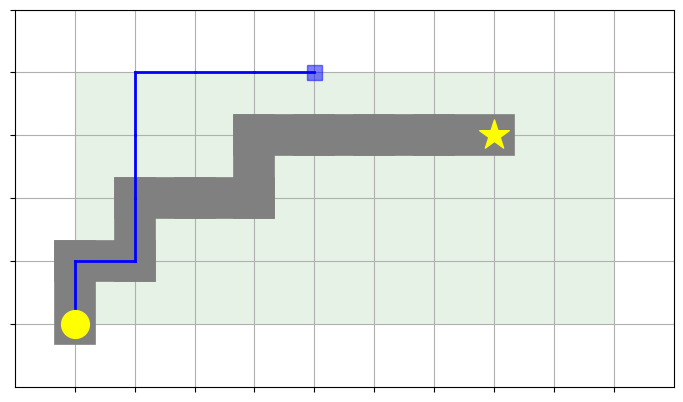

[(1, 0), (2, 0), (3, 0), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (8, 2)]


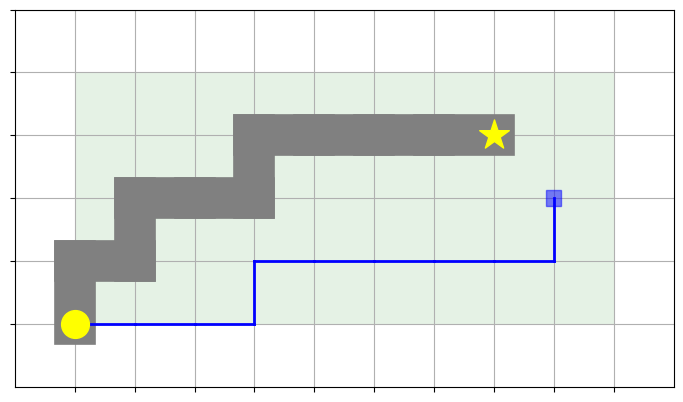

Which trajectory is better? (0: above, 1: below) 0
[(1, 0), (1, 1), (2, 1), (2, 2), (3, 2), (4, 2), (5, 2), (5, 3), (6, 3), (7, 3)]


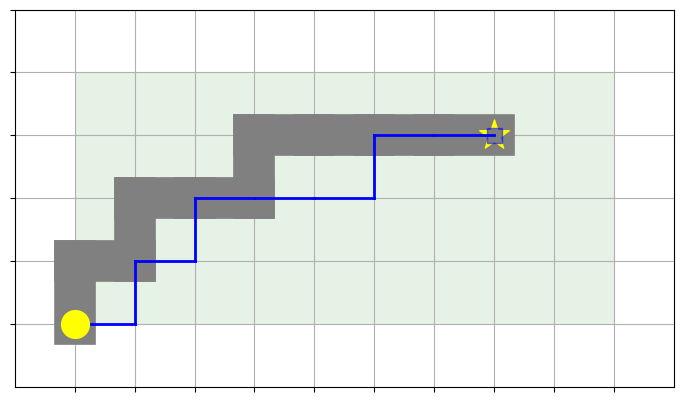

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 4), (1, 4), (1, 4), (2, 4), (3, 4), (4, 4)]


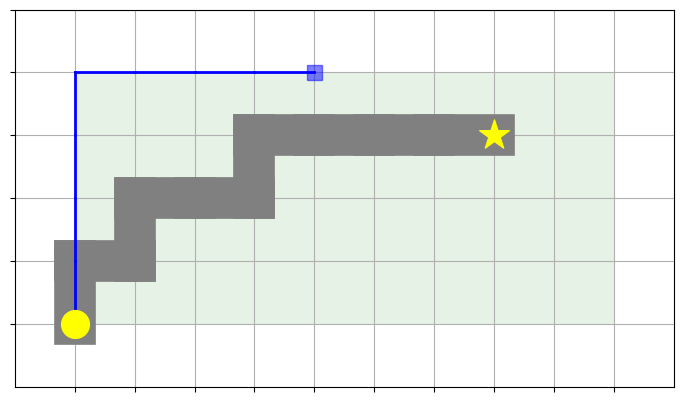

Which trajectory is better? (0: above, 1: below) 0
[(1, 0), (1, 1), (2, 1), (3, 1), (3, 2), (3, 3), (4, 3), (5, 3), (5, 4), (6, 4)]


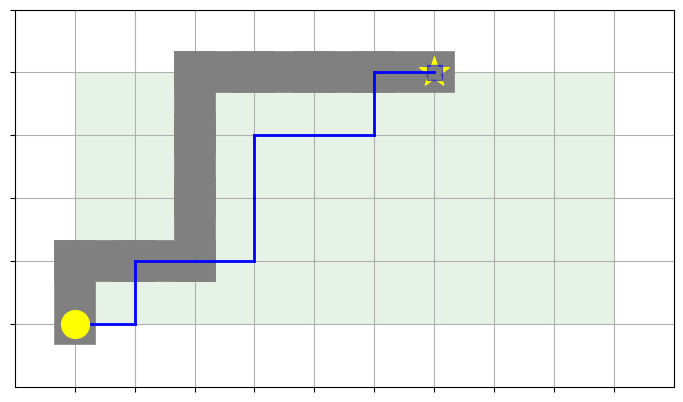

[(0, 1), (0, 2), (1, 2), (1, 3), (1, 4), (1, 4), (2, 4), (3, 4), (4, 4), (4, 4)]


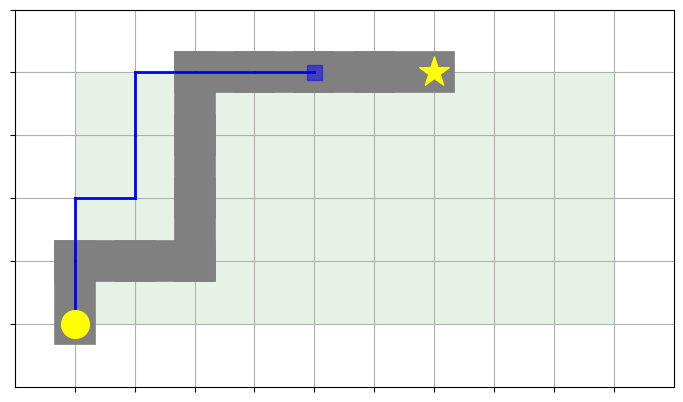

Which trajectory is better? (0: above, 1: below) 0
[(0, 1), (0, 2), (0, 3), (1, 3), (1, 4), (1, 4), (1, 4), (2, 4), (2, 4), (3, 4)]


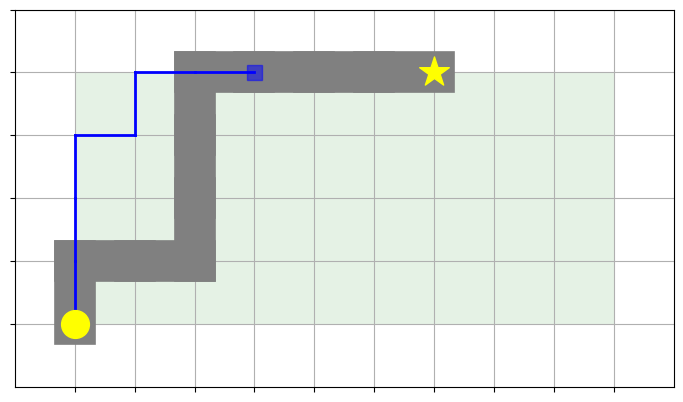

[(1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3), (4, 4), (5, 4), (6, 4)]


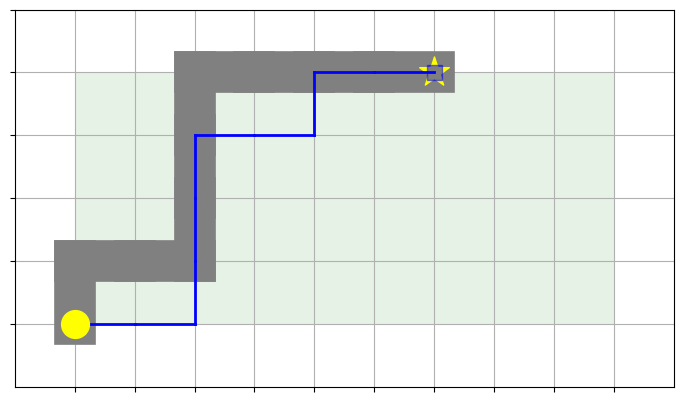

Which trajectory is better? (0: above, 1: below) 1
[(0, 1), (1, 1), (1, 2), (1, 3), (1, 4), (2, 4), (2, 4), (3, 4), (3, 4), (4, 4)]


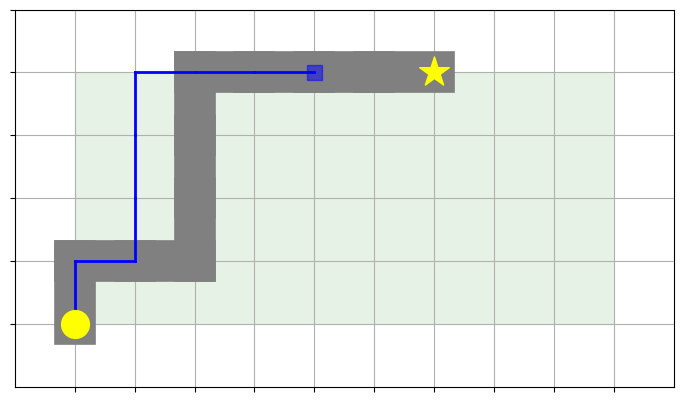

[(1, 0), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3), (5, 3), (5, 4), (6, 4)]


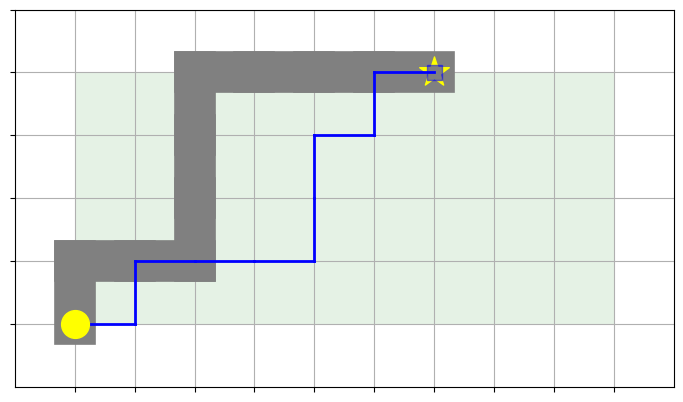

Which trajectory is better? (0: above, 1: below) 0
[(1, 0), (1, 1), (2, 1), (3, 1), (3, 2), (4, 2), (5, 2), (6, 2), (6, 3), (6, 4)]


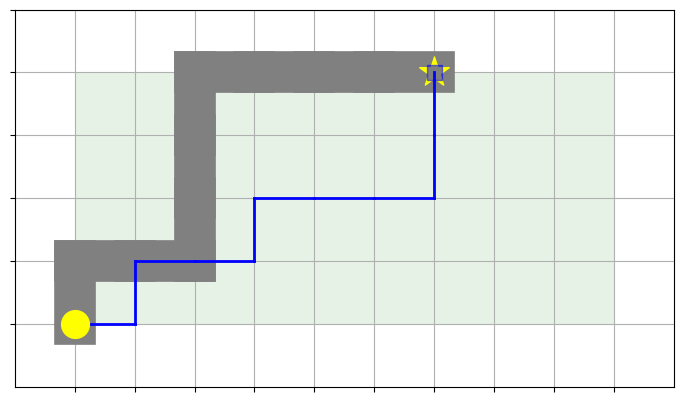

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 4), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]


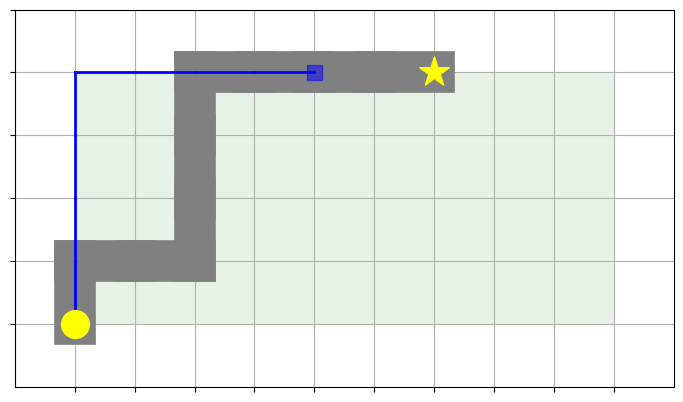

Which trajectory is better? (0: above, 1: below) 1


In [40]:
reward_PbRL= []
num_exp = 14

for _ in range(num_exp):
    # Define Grid and RL Agent
    env = GridEnvironment(grid_width, grid_height, num_steps, [0,0])
    road = random_road(car_init, num_steps, grid_width, grid_height) # The road is the ideal path to be completed in num_steps
    agent_Bernoulli = QLearningAgent_Bernoulli_PbRL(env, alpha_init = 0.5, beta_init = 0.5)
    # Run learning
    reward_Bernoulli = agent_Bernoulli.learn(4, ask_preference_HF,\
                                             road, grid_width, grid_height, car_init[0])
    reward_PbRL.append(agent_Bernoulli.exp_reward)

[(1, 0), (1, 1), (2, 1), (2, 2), (3, 2), (4, 2), (5, 2), (5, 3), (6, 3), (7, 3)]


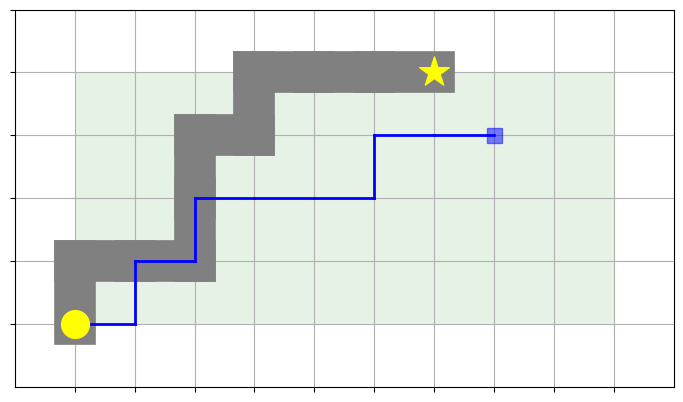

[(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (2, 4), (3, 4), (3, 4), (4, 4)]


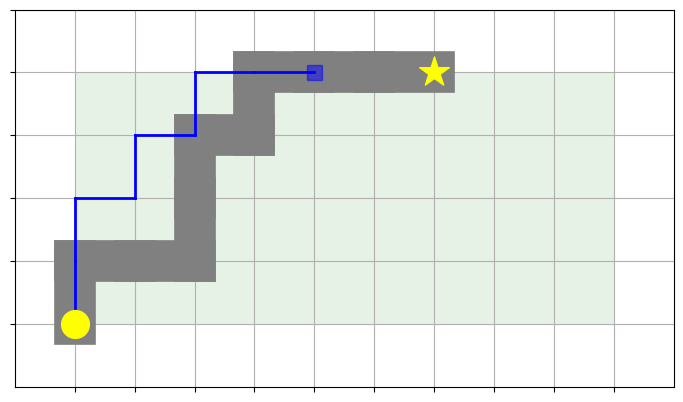

Which trajectory is better? (0: above, 1: below) 1
[(0, 1), (1, 1), (1, 2), (2, 2), (2, 3), (2, 4), (2, 4), (2, 4), (2, 4), (3, 4)]


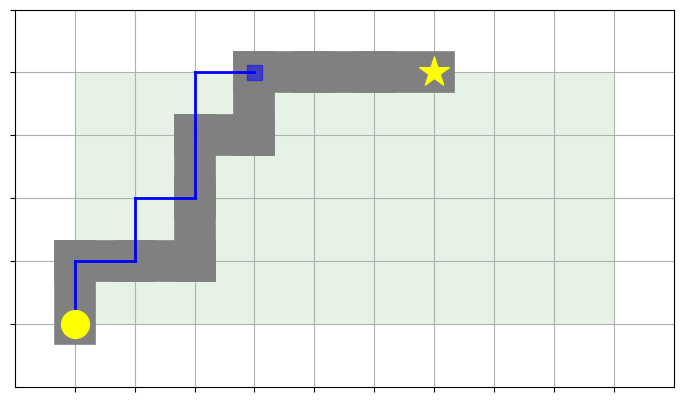

[(1, 0), (2, 0), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (7, 2), (8, 2)]


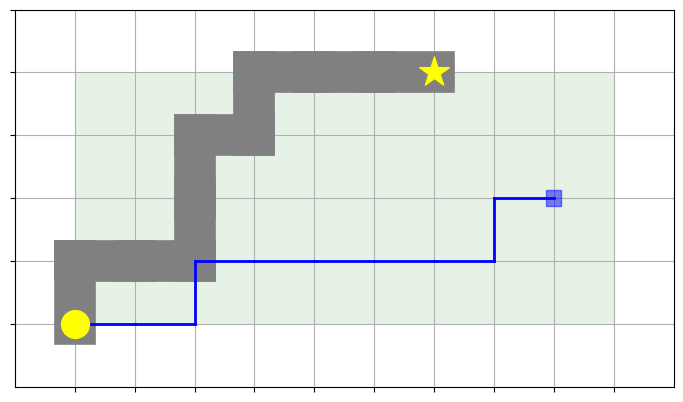

Which trajectory is better? (0: above, 1: below) 0
[(1, 0), (1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (4, 3), (4, 4), (4, 4), (4, 4)]


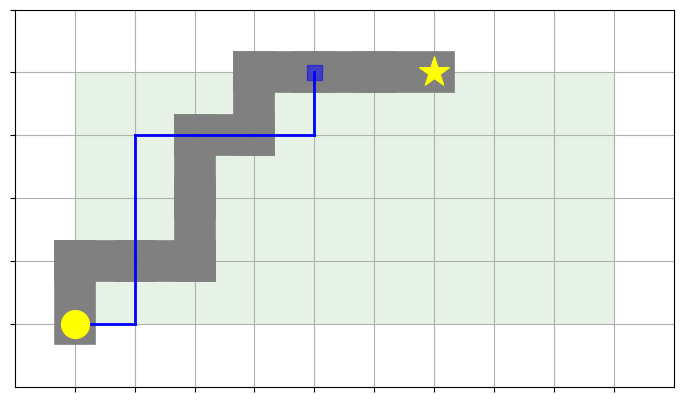

[(0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (1, 4), (1, 4), (1, 4), (2, 4), (3, 4)]


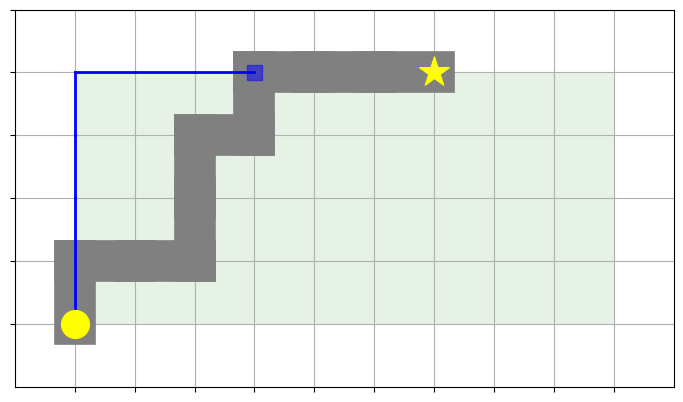

Which trajectory is better? (0: above, 1: below) 0
[(0, 1), (1, 1), (2, 1), (3, 1), (3, 2), (4, 2), (5, 2), (5, 3), (6, 3), (7, 3)]


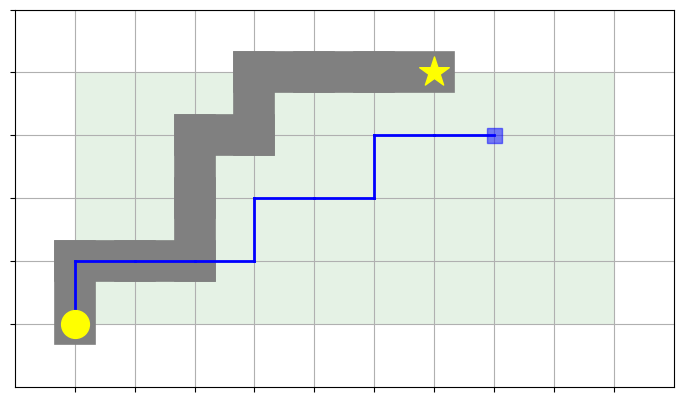

[(0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3), (4, 3), (4, 4), (5, 4), (6, 4)]


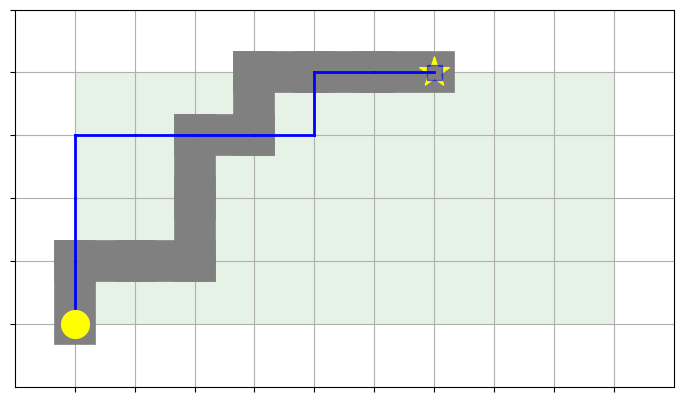

Which trajectory is better? (0: above, 1: below) 1
[(0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (1, 4), (1, 4), (2, 4), (2, 4), (3, 4)]


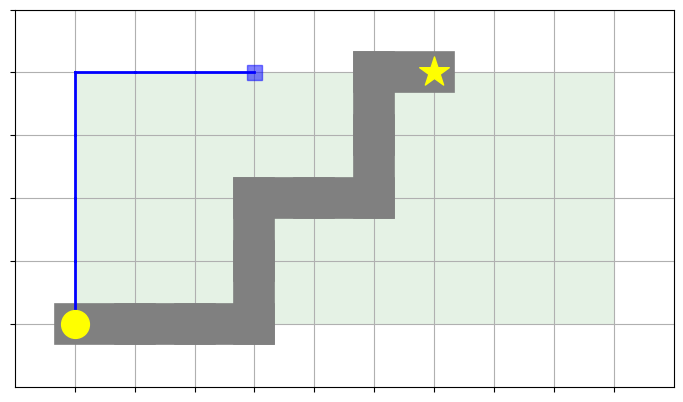

[(1, 0), (1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (4, 3), (4, 4), (4, 4), (5, 4)]


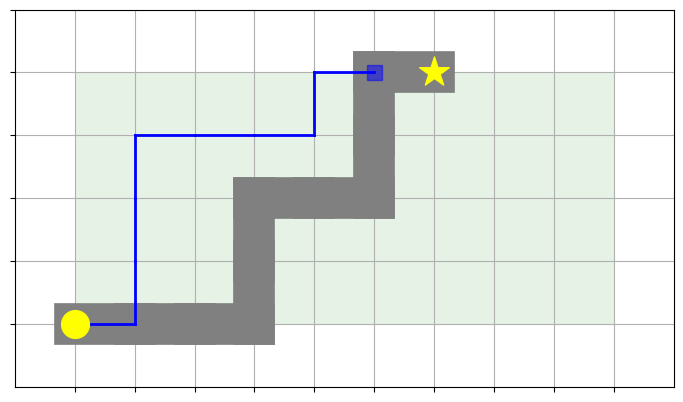

Which trajectory is better? (0: above, 1: below) 1
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 4), (0, 4), (1, 4), (1, 4), (1, 4), (2, 4)]


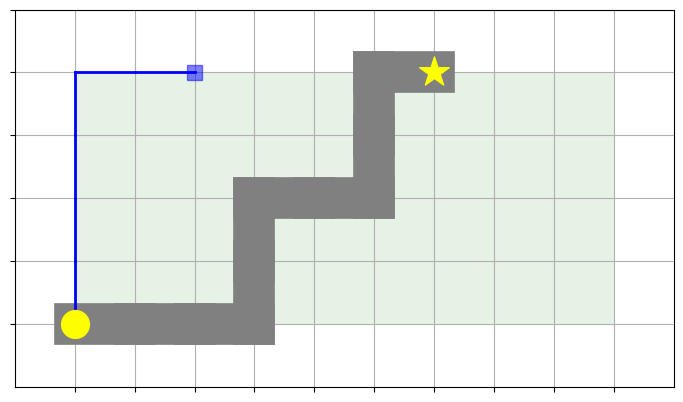

[(1, 0), (1, 1), (2, 1), (3, 1), (3, 2), (4, 2), (4, 3), (4, 4), (5, 4), (5, 4)]


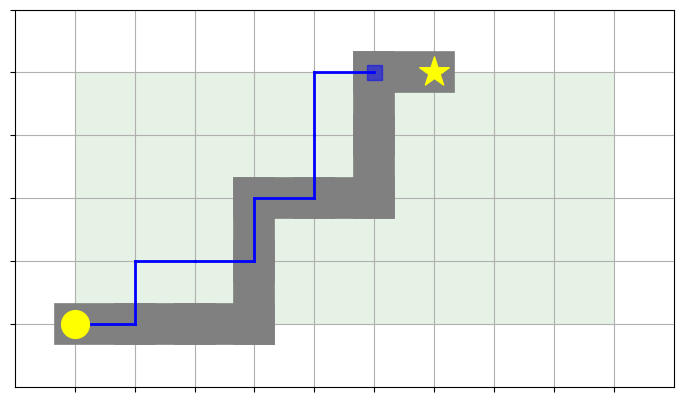

Which trajectory is better? (0: above, 1: below) 1
[(1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4), (4, 4), (4, 4)]


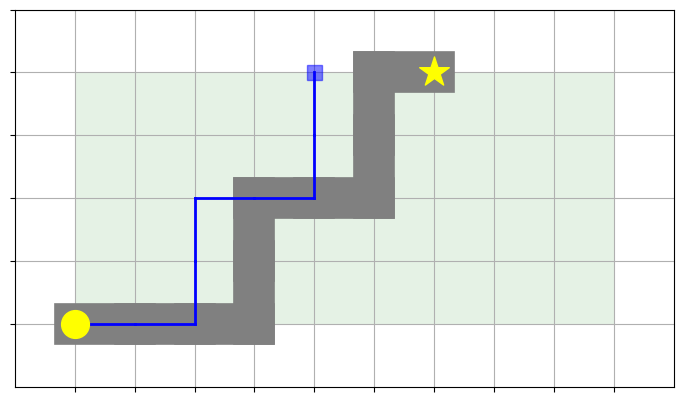

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 4), (0, 4), (0, 4), (0, 4), (1, 4), (1, 4)]


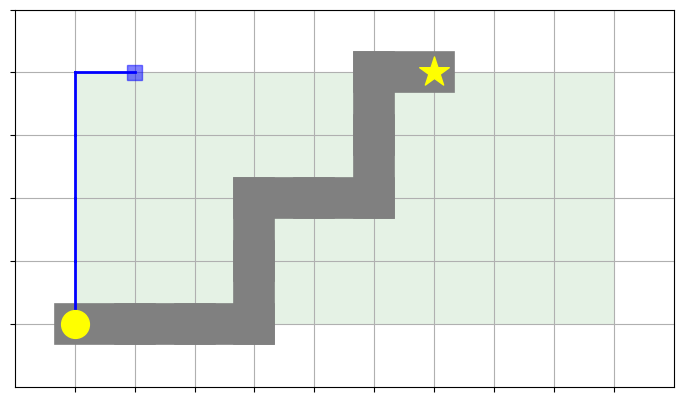

Which trajectory is better? (0: above, 1: below) 0
[(1, 0), (2, 0), (2, 1), (3, 1), (4, 1), (4, 2), (5, 2), (6, 2), (6, 3), (7, 3)]


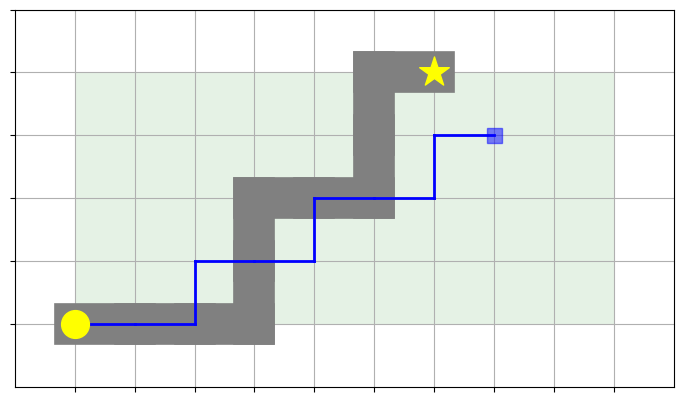

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4), (5, 4)]


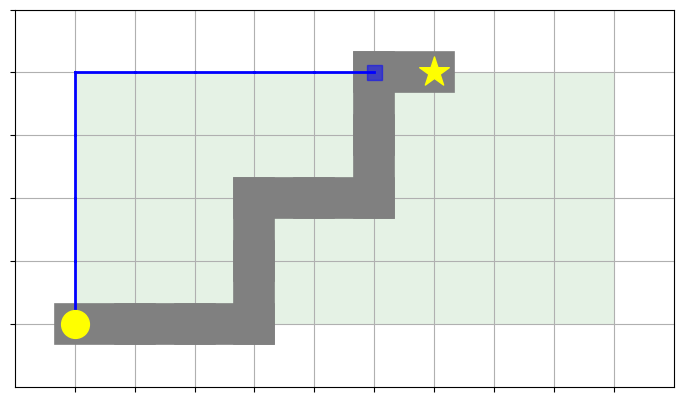

Which trajectory is better? (0: above, 1: below) 0
[(1, 0), (1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (3, 4), (4, 4), (4, 4), (5, 4)]


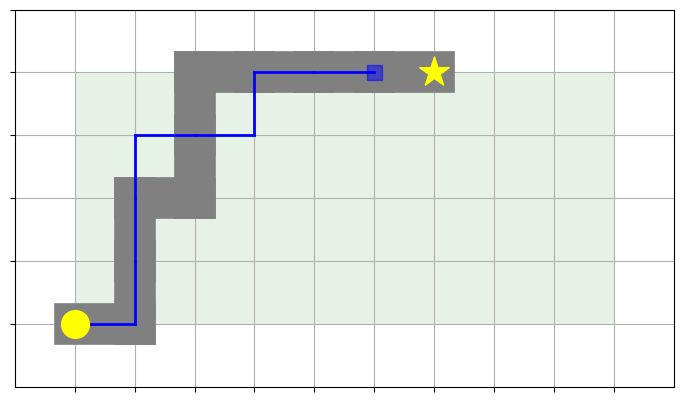

[(0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (1, 4), (1, 4), (1, 4), (2, 4), (2, 4)]


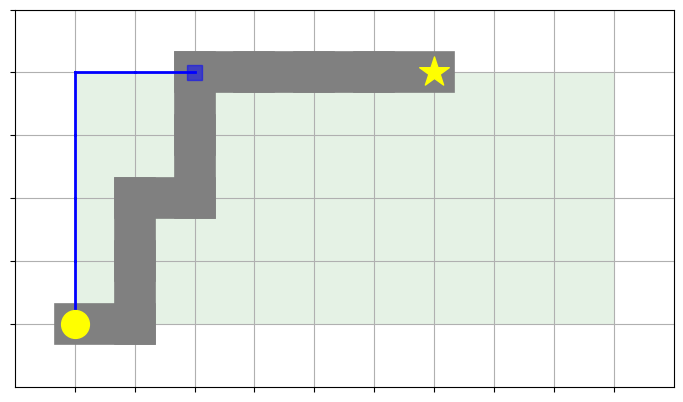

Which trajectory is better? (0: above, 1: below) 0
[(1, 0), (2, 0), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (6, 2), (6, 3), (6, 4)]


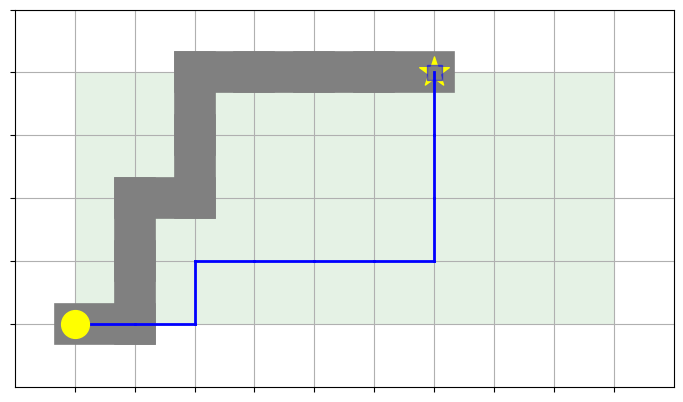

[(0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (1, 4), (2, 4), (3, 4), (3, 4), (3, 4)]


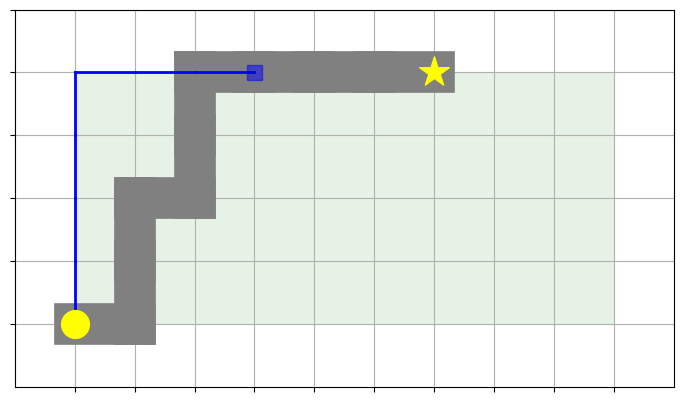

Which trajectory is better? (0: above, 1: below) 0
[(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 3), (3, 4), (4, 4), (4, 4), (4, 4)]


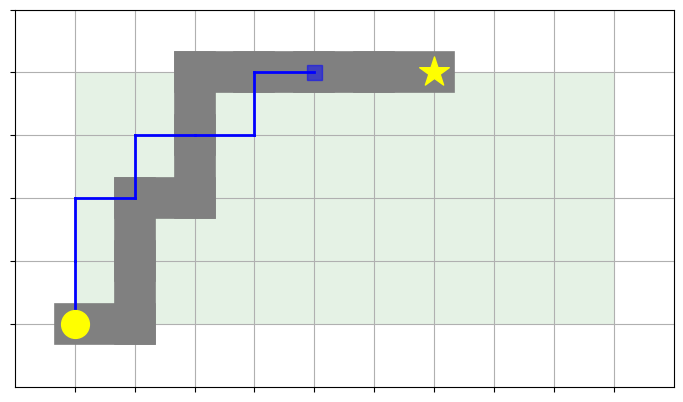

[(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (6, 1), (7, 1), (8, 1), (9, 1)]


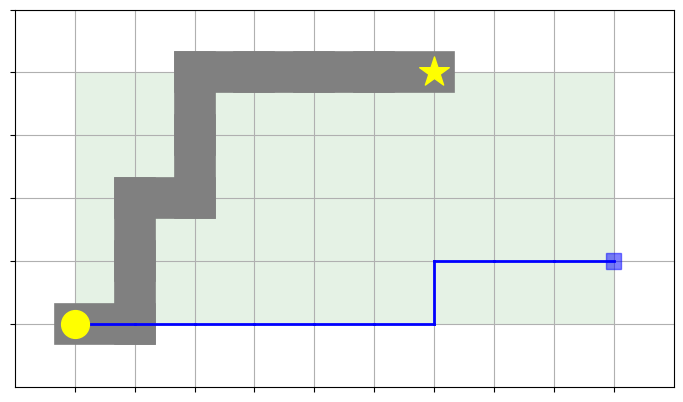

Which trajectory is better? (0: above, 1: below) 0
[(1, 0), (1, 1), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3), (4, 4), (4, 4), (5, 4)]


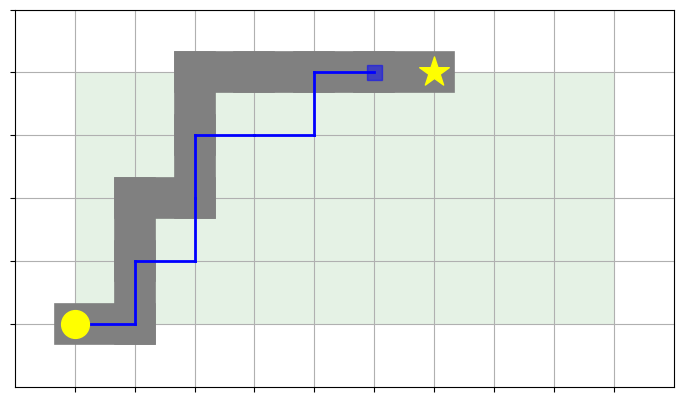

[(0, 1), (0, 2), (0, 3), (1, 3), (1, 4), (1, 4), (2, 4), (2, 4), (3, 4), (3, 4)]


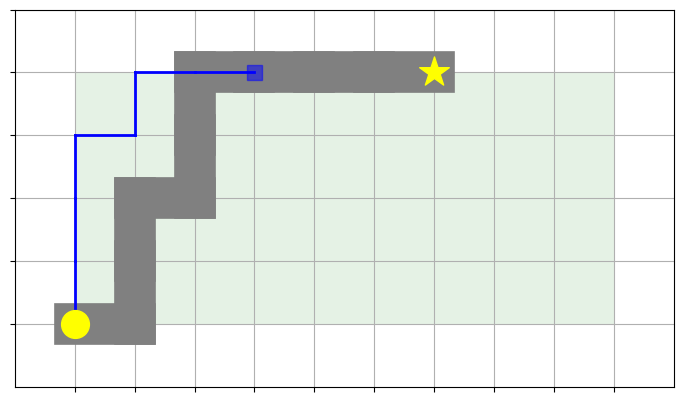

Which trajectory is better? (0: above, 1: below) 0
[(0, 1), (0, 2), (0, 3), (1, 3), (1, 4), (2, 4), (3, 4), (4, 4), (4, 4), (4, 4)]


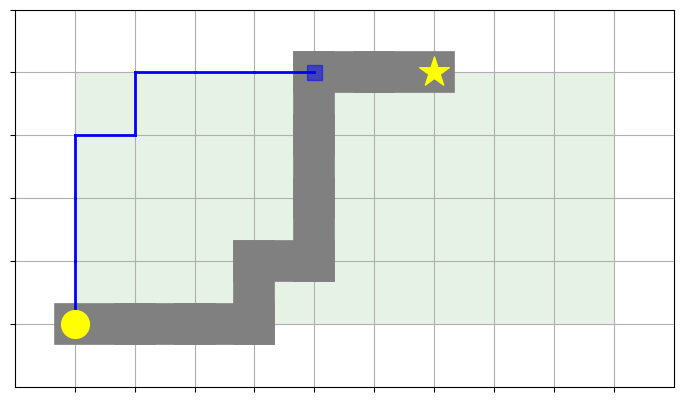

[(1, 0), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (5, 2), (5, 3), (6, 3), (6, 4)]


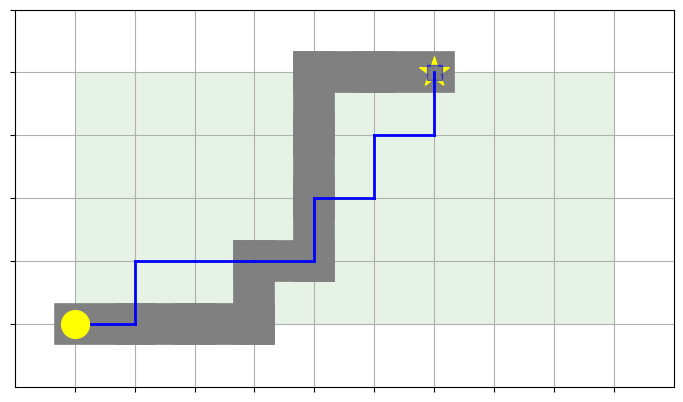

Which trajectory is better? (0: above, 1: below) 1
[(1, 0), (2, 0), (2, 1), (3, 1), (3, 2), (4, 2), (5, 2), (5, 3), (6, 3), (6, 4)]


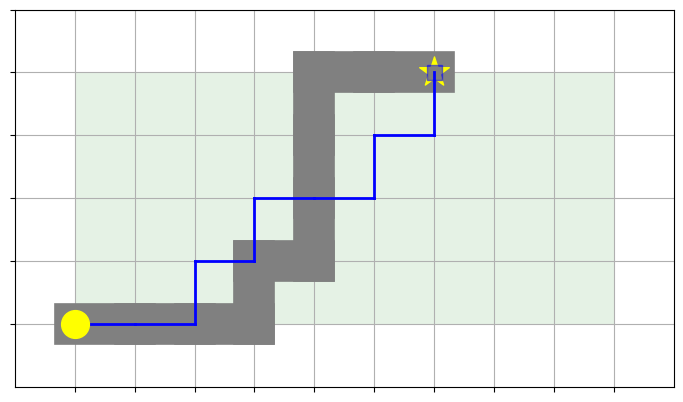

[(0, 1), (1, 1), (1, 2), (1, 3), (1, 4), (2, 4), (2, 4), (3, 4), (4, 4), (5, 4)]


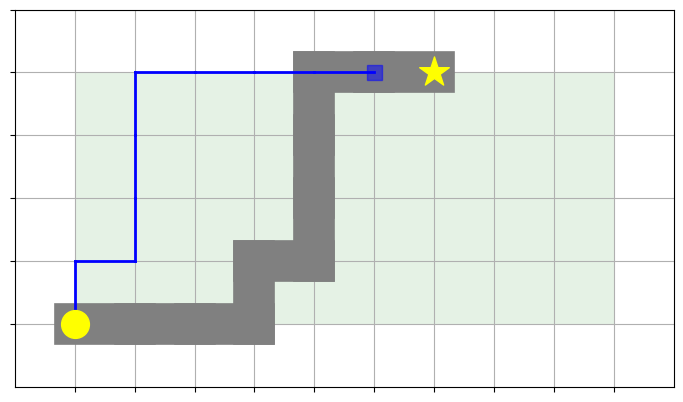

Which trajectory is better? (0: above, 1: below) 0
[(0, 1), (0, 2), (1, 2), (1, 3), (1, 4), (2, 4), (2, 4), (2, 4), (3, 4), (4, 4)]


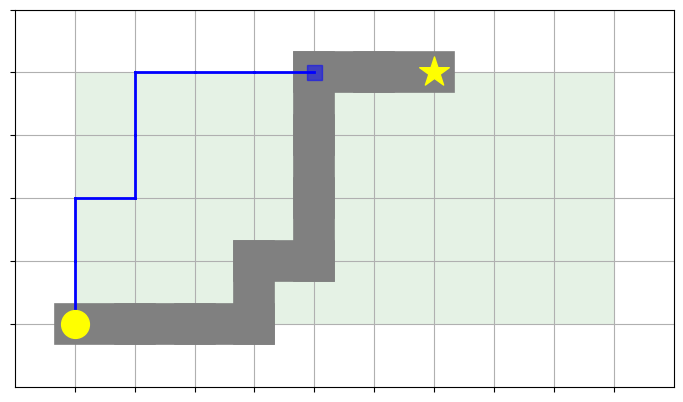

[(1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (5, 1), (5, 2), (5, 3), (6, 3), (6, 4)]


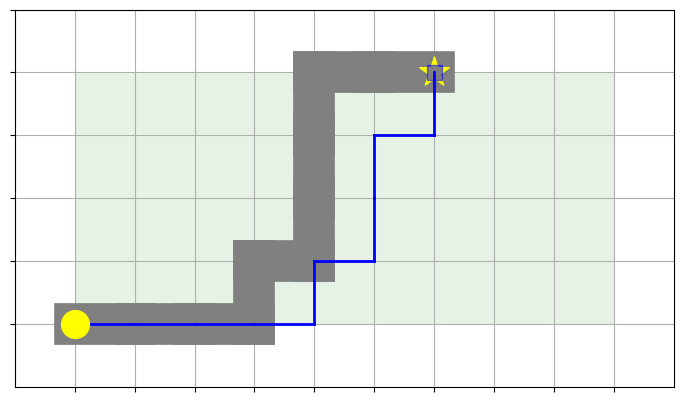

Which trajectory is better? (0: above, 1: below) 1
[(1, 0), (1, 1), (2, 1), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (6, 3), (7, 3)]


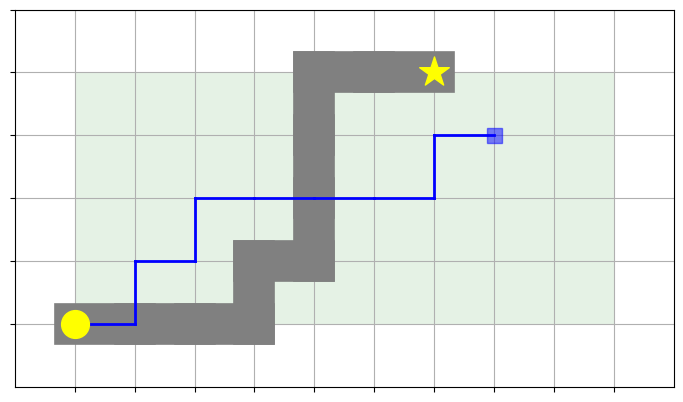

[(0, 1), (0, 2), (1, 2), (1, 3), (1, 4), (1, 4), (1, 4), (1, 4), (2, 4), (2, 4)]


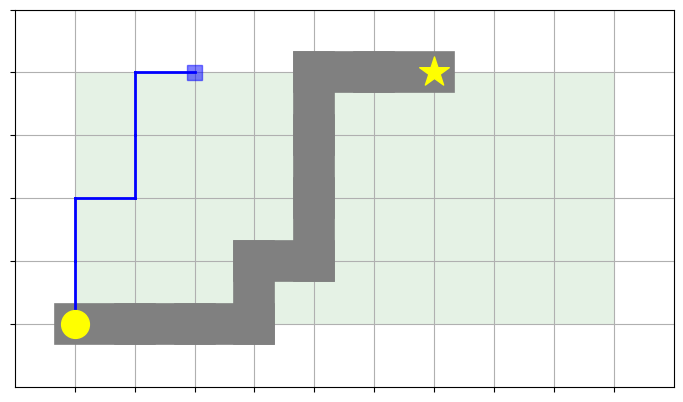

Which trajectory is better? (0: above, 1: below) 0
[(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (6, 1), (7, 1), (7, 2), (7, 3)]


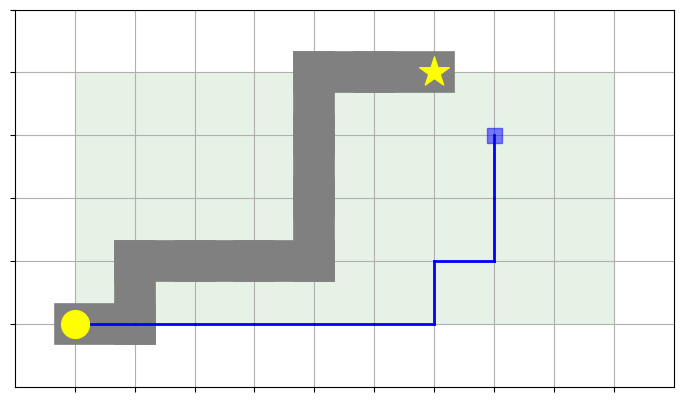

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 4), (1, 4), (2, 4), (2, 4), (2, 4), (3, 4)]


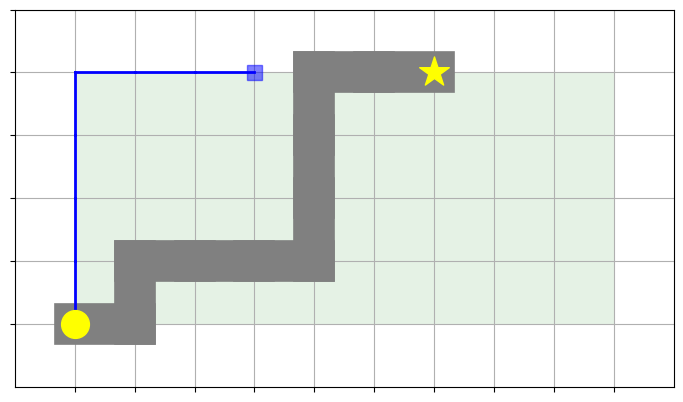

Which trajectory is better? (0: above, 1: below) 0
[(0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (1, 4), (2, 4), (2, 4), (2, 4), (2, 4)]


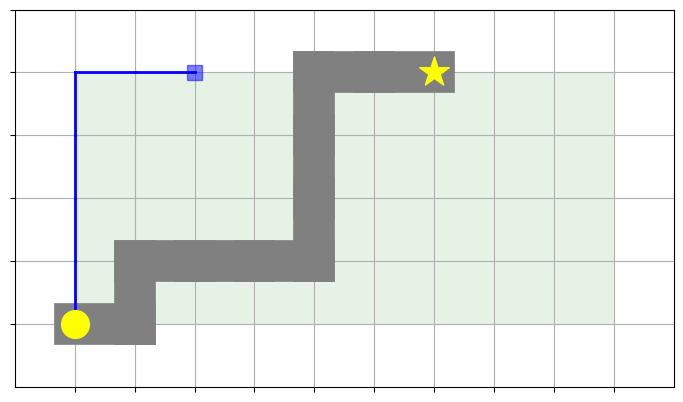

[(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (7, 1), (8, 1), (9, 1)]


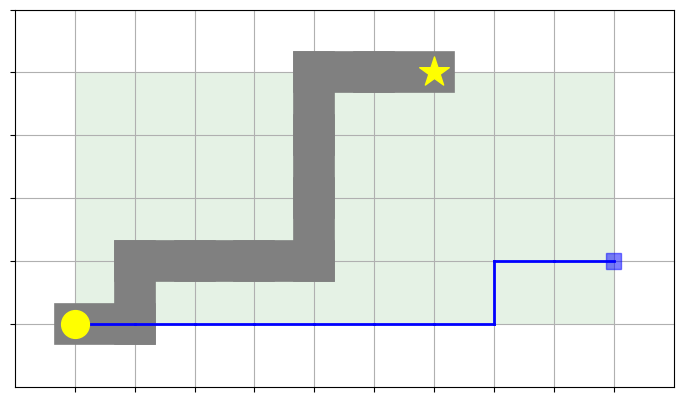

Which trajectory is better? (0: above, 1: below) 1
[(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (5, 1), (5, 2), (6, 2), (7, 2), (7, 3)]


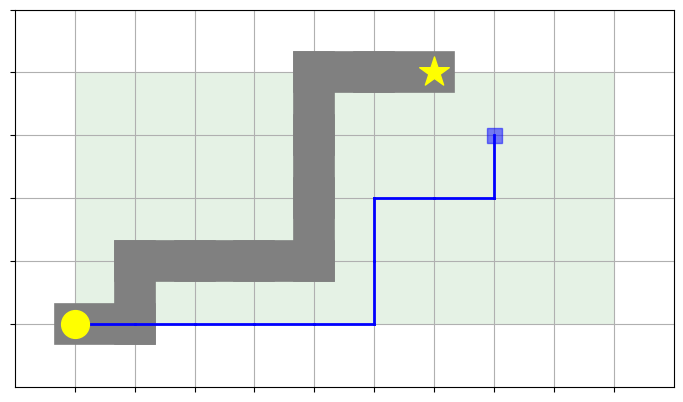

[(0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (1, 4), (1, 4), (1, 4), (1, 4), (1, 4)]


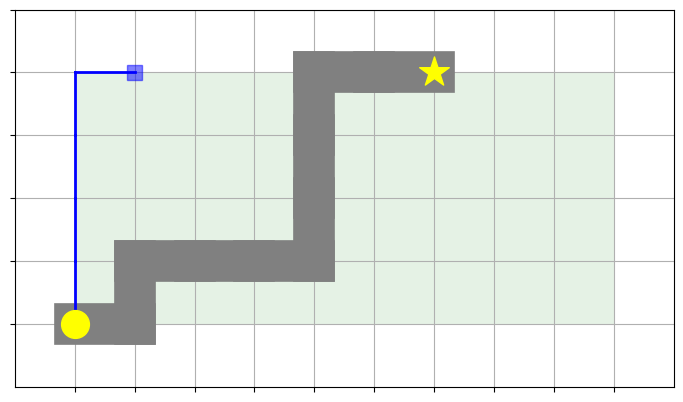

Which trajectory is better? (0: above, 1: below) 0
[(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (5, 1), (6, 1), (7, 1), (7, 2), (8, 2)]


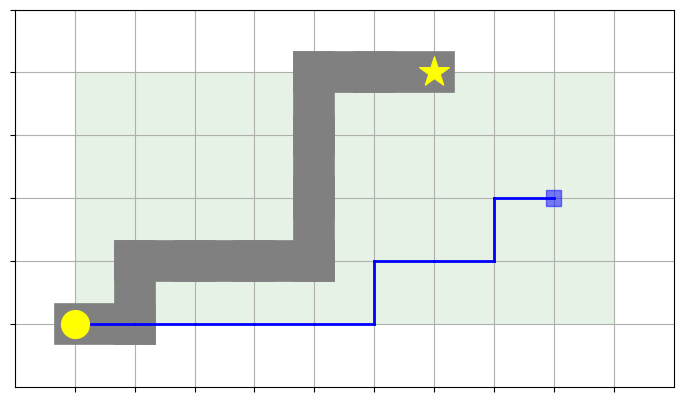

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 4), (1, 4), (2, 4), (2, 4), (2, 4), (3, 4)]


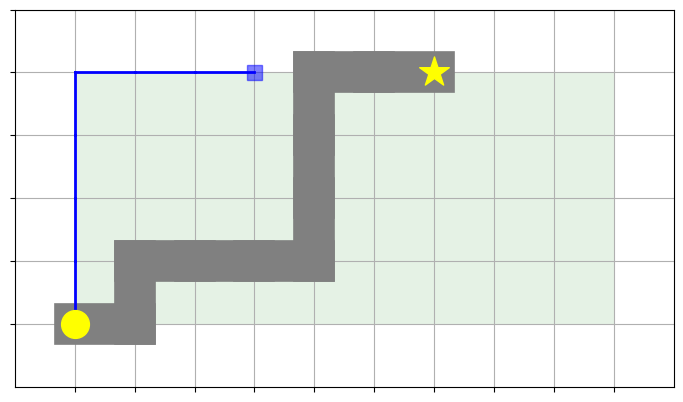

Which trajectory is better? (0: above, 1: below) 0


In [56]:
reward_PbRL2= []
num_exp = 5

for _ in range(num_exp):
    # Define Grid and RL Agent
    env = GridEnvironment(grid_width, grid_height, num_steps, [0,0])
    road = random_road(car_init, num_steps, grid_width, grid_height) # The road is the ideal path to be completed in num_steps
    agent_Bernoulli = QLearningAgent_Bernoulli_PbRL(env, alpha_init = 0.5, beta_init = 0.5)
    # Run learning
    reward_Bernoulli = agent_Bernoulli.learn(4, ask_preference_HF,\
                                             road, grid_width, grid_height, car_init[0])
    reward_PbRL2.append(agent_Bernoulli.exp_reward)

In [57]:
reward_PbRL2

[[-8, -8, -5, -6],
 [-9, -9, -7, -6],
 [-4, -7, -5, -4],
 [-5, -5, -4, -5],
 [-9, -9, -9, -9]]

In [48]:
reward_PbRL_array = np.array(reward_PbRL)
reward_PbRL_array += 10
reward_PbRL_array = - reward_PbRL_array

In [63]:
with open('human_experiments/grid_PbRL_14Experiments.pickle', 'wb') as f:
    pickle.dump(reward_PbRL, f)

In [58]:
reward_PbRL_array

array([[ -8, -10,  -4,  -6],
       [ -6,  -5,  -6,  -6],
       [ -6,  -4,  -4,  -4],
       [ -8,  -7,  -7,  -6],
       [ -4,  -6,  -5,  -4],
       [ -3,  -3,  -5,  -5],
       [ -7,  -4,  -4,  -4],
       [ -6,  -6,  -6,  -6],
       [ -8,  -8,  -8,  -8],
       [ -7,  -5,  -4,  -4],
       [ -4,  -4,  -5,  -5],
       [ -6,  -7,  -9,  -9],
       [ -6,  -5,  -6,  -4],
       [ -7,  -5,  -4,  -9]])

In [62]:
reward_PbRL = [[-8, -8, -5, -6],
 [-9, -9, -7, -6],
 [-9, -9, -9, -9], 
       [ -8, -10,  -4,  -6],
       [ -6,  -5,  -6,  -6],
       [ -6,  -4,  -4,  -4],
       [ -8,  -7,  -7,  -6],
       [ -7,  -4,  -4,  -4],
       [ -6,  -6,  -6,  -6],
       [ -8,  -8,  -8,  -8],
       [ -7,  -5,  -4,  -4],
       [ -6,  -7,  -9,  -9],
       [ -6,  -5,  -6,  -4],
       [ -7,  -5,  -4,  -9]]